In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.image as mpimg
from datetime import datetime, timedelta

In [85]:
#YHM Data found here: https://hamilton.weatherstats.ca/download.html (LOOK FOR DAILY CLIMATE AND DOWNLOAD MONTHLY)
Yearly = pd.read_excel(r'C:\Users\Anton\Desktop\Visualization\YHM Reports\YHM 2024\Yearly.xlsx')
Yearly.head(5)

,date,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
0,2024-05-03,13.1,11.10,10.60,8.1,NaN,NaN,100,93.1,87.5,...,NaN,NaN,8,6.3,4.0,0,NaN,NaN,NaN,NaN
1,2024-05-02,21.5,14.78,15.55,9.6,NaN,NaN,86,66.4,64.5,...,NaN,NaN,7,2.8,3.5,0,NaN,NaN,NaN,NaN
2,2024-05-01,23.2,14.88,13.95,4.7,25.0,NaN,100,73.5,71.0,...,NaN,NaN,8,4.3,4.5,1,NaN,NaN,NaN,NaN
3,2024-04-30,21.4,12.39,14.45,7.5,25.0,NaN,100,93.1,78.5,...,NaN,NaN,8,6.8,5.0,2,NaN,NaN,NaN,NaN
4,2024-04-29,12.6,9.39,9.90,7.2,NaN,NaN,100,97.7,94.0,...,NaN,NaN,8,7.5,7.0,6,NaN,NaN,NaN,NaN


In [86]:
#YEARLY BREAKDOWN

#HIGHEST MAX TEMP
Highest_Temp = Yearly['max_temperature'].max()  
Date_Highest_Temp = Yearly.loc[Yearly['max_temperature'].idxmax(), 'date'].strftime('%m-%d')
print(f"Highest High Temperature = {Highest_Temp}°C on {Date_Highest_Temp}")

#LOWEST HIGH TEMP
Lowest_High = Yearly['max_temperature'].min()
Date_Lowest_High = Yearly.loc[Yearly['max_temperature'].idxmin(), 'date'].strftime('%m-%d')
print(f"Lowest High Temperature = {Lowest_High}°C on {Date_Lowest_High}")

#HIGHEST LOW TEMP
Highest_Low = Yearly['min_temperature'].max()
Date_Highest_Low_Temp = Yearly.loc[Yearly['min_temperature'].idxmax(), 'date'].strftime('%m-%d')
print(f"Highest Low Temperature = {Highest_Low}°C on {Date_Highest_Low_Temp}")

#LOWEST LOW TEMP
Low_Low = Yearly['min_temperature'].min()  
Date_Low_Low = Yearly.loc[Yearly['min_temperature'].idxmin(), 'date'].strftime('%m-%d')
print(f"Lowest Low Temperature = {Low_Low}°C on {Date_Low_Low}")

#LOWEST WIND CHILL
Lowest_Windchill = Yearly['min_windchill'].min()
Date_Low_Windchill = Yearly.loc[Yearly['min_windchill'].idxmin(), 'date'].strftime('%m-%d')
print(f"Lowest Windchill = {Lowest_Windchill}°C on {Date_Low_Windchill}")

#LARGEST MAX TEMPERATURE CHANGE (HIGHS)
Yearly['day_to_day_max_change'] = Yearly['max_temperature'].diff()
max_day_change = Yearly.loc[Yearly['day_to_day_max_change'].idxmax()]
date_max_day_change = max_day_change['date'].strftime('%m-%d')
max_day_temperature_change = max_day_change['day_to_day_max_change']
print(f"Largest 24 Hour High Temperature Change = {max_day_temperature_change:.1f}°C on {date_max_day_change}")

#LARGEST MIN TEMPERATURE CHANGE (LOWS)
Yearly['day_to_day_min_change'] = Yearly['min_temperature'].diff()
min_day_change = Yearly.loc[Yearly['day_to_day_min_change'].idxmin()]
date_min_day_change = min_day_change['date'].strftime('%m-%d')
min_day_temperature_change = min_day_change['day_to_day_min_change']
print(f"Largest 24 Hour Low Temperature Change = {min_day_temperature_change:.1f}°C on {date_min_day_change}")

#LARGEST HIGH TO LOW TEMPERATURE CHANGE IN A DAY
Yearly['high_to_low_difference'] = Yearly['max_temperature'] - Yearly['min_temperature']
max_high_to_low_difference = Yearly.loc[Yearly['high_to_low_difference'].idxmax()]
date_max_high_to_low_difference = max_high_to_low_difference ['date'].strftime('%m-%d')
max_high_to_low_difference = max_high_to_low_difference ['high_to_low_difference']
print(f"Largest 24 Hour Overall Temperature Change = {max_high_to_low_difference:.1f}°C on {date_max_high_to_low_difference}")

#HIGHEST SUSTAINED WIND
Highest_Sustained_Wind = Yearly['max_wind_speed'].max()
Date_Highest_Wind = Yearly.loc[Yearly['max_wind_speed'].idxmax(), 'date'].strftime('%m-%d')
print(f"Highest Recorded Sustained Wind Speed = {Highest_Sustained_Wind} km/h on {Date_Highest_Wind}")

#HIGHEST WIND GUST
Highest_Wind_Gust = Yearly['max_wind_gust'].max()
Date_Highest_Gust = Yearly.loc[Yearly['max_wind_gust'].idxmax(), 'date'].strftime('%m-%d')
print(f"Highest Recorded Wind Gust = {Highest_Wind_Gust} km/h on {Date_Highest_Wind}")

#TOTAL YEARLY PRECIP
Total = Yearly['precipitation'].sum().round(2)   
print(f"Total Precipitation = {Total} mm")

#TOTAL YEARLY RAIN
Total_Rain = Yearly['rain'].sum().round(2)   
print(f"Total Yearly Rain = {Total_Rain} mm")

#TOTAL YEARLY SNOW
Total_Snow = Yearly['snow'].sum().round(2)   
print(f"Total Yearly Snow = {Total_Snow} cm")

#HIGHEST DAY PRECIPITATION TOTAL
Highest_Precip = Yearly['precipitation'].max()   
Date_Highest_Precipitation = Yearly.loc[Yearly['precipitation'].idxmax(), 'date'].strftime('%m-%d')
print(f"Highest Precipitation Day = {Highest_Precip} mm on {Date_Highest_Precipitation}")

#HIGHEST DAY RAIN TOTAL
Highest_Rain = Yearly['rain'].max()  
Highest_Rain_Day = Yearly.loc[Yearly['rain'].idxmax(), 'date'].strftime('%m-%d')
print(f"Highest Rainfall Day = {Highest_Rain} mm on {Highest_Rain_Day}")

#HIGHEST DAY SNOW TOTAL
Highest_Snow = Yearly['snow'].max()
Highest_Snow_Day = Yearly.loc[Yearly['snow'].idxmax(), 'date'].strftime('%m-%d')
print(f"Highest Snowfall Day = {Highest_Snow} cm  on {Highest_Snow_Day}")

#MAXIMUM SNOW ON GROUND
Yearly['snow_on_ground'].fillna(0, inplace=True)
Maximum_Snow = Yearly['snow_on_ground'].max()
if np.isnan(Maximum_Snow):
    Maximum_Snow = 0 
Maximum_Snow_Day = Yearly.loc[Yearly['snow_on_ground'].idxmax(), 'date'].strftime('%m-%d')
print(f"Maximum Snow On Ground = {Maximum_Snow} cm on {Maximum_Snow_Day}")

#HIGHEST BAROMETRIC PRESSURE
Highest_Pressure = Yearly['max_pressure_sea'].max() *10
Date_Highest_Pressure = Yearly.loc[Yearly['max_pressure_sea'].idxmax(), 'date'].strftime('%m-%d')
print(f"Highest Barometric Pressure = {Highest_Pressure:.1f} mbar on {Date_Highest_Pressure}")

#LOWEST BAROMETRIC PRESSURE
Lowest_Pressure = Yearly['min_pressure_sea'].min() *10
Date_Lowest_Pressure = Yearly.loc[Yearly['min_pressure_sea'].idxmin(), 'date'].strftime('%m-%d')
print(f"Lowest Barometric Pressure = {Lowest_Pressure:.1f} mbar on {Date_Lowest_Pressure}")

#For Yearly Average
Yearly_Health = Yearly['avg_health_index'].mean() 
print(f"Yearly Average Health Index = {Yearly_Health:.2f}")

#For Highest Health Index Yearly
Highest_Health = Yearly['max_health_index'].max()  
Date_Highest_Health = Yearly.loc[Yearly['max_health_index'].idxmax(), 'date'].strftime('%m-%d')
print(f"Highest Health Index = {Highest_Health:.2f} on {Date_Highest_Health}")

Highest High Temperature = 23.8°C on 04-09
Lowest High Temperature = -9.0°C on 01-15
Highest Low Temperature = 12.6°C on 04-28
Lowest Low Temperature = -17.1°C on 01-20
Lowest Windchill = -28.0°C on 01-17
Largest 24 Hour High Temperature Change = 17.5°C on 02-28
Largest 24 Hour Low Temperature Change = -9.3°C on 12-08
Largest 24 Hour Overall Temperature Change = 21.2°C on 04-09
Highest Recorded Sustained Wind Speed = 58 km/h on 01-13
Highest Recorded Wind Gust = 87.0 km/h on 01-13
Total Precipitation = 328.5 mm
Total Yearly Rain = 280.3 mm
Total Yearly Snow = 42.0 cm
Highest Precipitation Day = 29.9 mm on 01-09
Highest Rainfall Day = 26.9 mm on 01-09
Highest Snowfall Day = 6.8 cm  on 01-23
Maximum Snow On Ground = 6.0 cm on 02-19
Highest Barometric Pressure = 1038.4 mbar on 12-13
Lowest Barometric Pressure = 979.1 mbar on 01-09
Yearly Average Health Index = 2.51
Highest Health Index = 5.20 on 04-27


In [87]:
#CONVERTING DATASET TO GET MONTHLY AVERAGES

#Convert the 'Day' column to datetime format
Yearly['date'] = pd.to_datetime(Yearly['date'])  

#Extract the month from the 'Day' column and create a new column 'Month'
Yearly['Month'] = Yearly['date'].dt.to_period('M')

#Group the DataFrame by 'Month' and calculate mean for 'Max Temp' and 'Min Temp', and sum for 'Total Precip', 'Rain', and 'Snow'
monthly_averages = Yearly.groupby('Month').agg({'max_temperature': 'mean','min_temperature': 'mean','precipitation': 'sum','rain': 'sum','snow': 'sum'}).round(1)

#Resetting index to have 'Month' as a column again
monthly_averages = monthly_averages.reset_index()

#Convert the 'Month' period labels to text month names
monthly_averages['Month'] = monthly_averages['Month'].dt.to_timestamp().dt.strftime('%B')
monthly_averages.head(12)

#Monthly Precip Average
Average_Precipitation = monthly_averages['precipitation'].mean()
print(f"Average Precipitation Per Month = {Average_Precipitation:.2f} mm")

Average_Rainfall = monthly_averages['rain'].mean()
print(f"Average Rainfall Per Month = {Average_Rainfall:.2f} mm")

Average_Snowfall = monthly_averages['snow'].mean()
print(f"Average Snowfall Per Month = {Average_Snowfall:.2f} mm")

#Average Yearly High Temperature
Yearly_High = monthly_averages['max_temperature'].median()
print(f"Average Yearly High Temperature  = {Yearly_High}°C")

#Average Yearly Low Temperature
Yearly_Low = monthly_averages['min_temperature'].median()
print(f"Average Yearly Low Temperature = {Yearly_Low}°C")

monthly_averages.head(15)

#Sorted_Avgs = monthly_averages.sort_values(by='Total Precip', ascending=False)
#Sorted_Avgs.head(12)




#MONTHLY BREAKDOWN (CLIMATOLOGY)
Climatology = pd.read_excel(r'C:\Users\Anton\Desktop\Visualization\YHM Reports\YHM Climate Normals 1981-2010.xlsx')

#Average Yearly High Temperature
Yearly_High_Climo = Climatology['Daily Maximum Temperature'].median()
print(f"Average Yearly High Climo Temperature  = {Yearly_High_Climo}°C")

#Average Yearly Low Temperature
Yearly_Low_Climo = Climatology['Daily Minimum Temperature'].median()
print(f"Average Yearly Low Climo Temperature = {Yearly_Low_Climo}°C")

Climatology.head(15)

#Sorted_Climo = Climatology.sort_values(by='Precipitation', ascending=False)
#Sorted_Climo.head(12)




#Calculating %s vs Climatology
observed_precip = 2  # mm
expected_precip = 33.5 # mm

percentage_higher = ((observed_precip - expected_precip) / expected_precip) * 100
print(f"Percentage Higher than Expected: {percentage_higher:.0f}%")



Average Precipitation Per Month = 54.75 mm
Average Rainfall Per Month = 46.72 mm
Average Snowfall Per Month = 7.00 mm
Average Yearly High Temperature  = 6.75°C
Average Yearly Low Temperature = -0.45°C
Average Yearly High Climo Temperature  = 12.95°C
Average Yearly Low Climo Temperature = 3.0°C
Percentage Higher than Expected: -94%


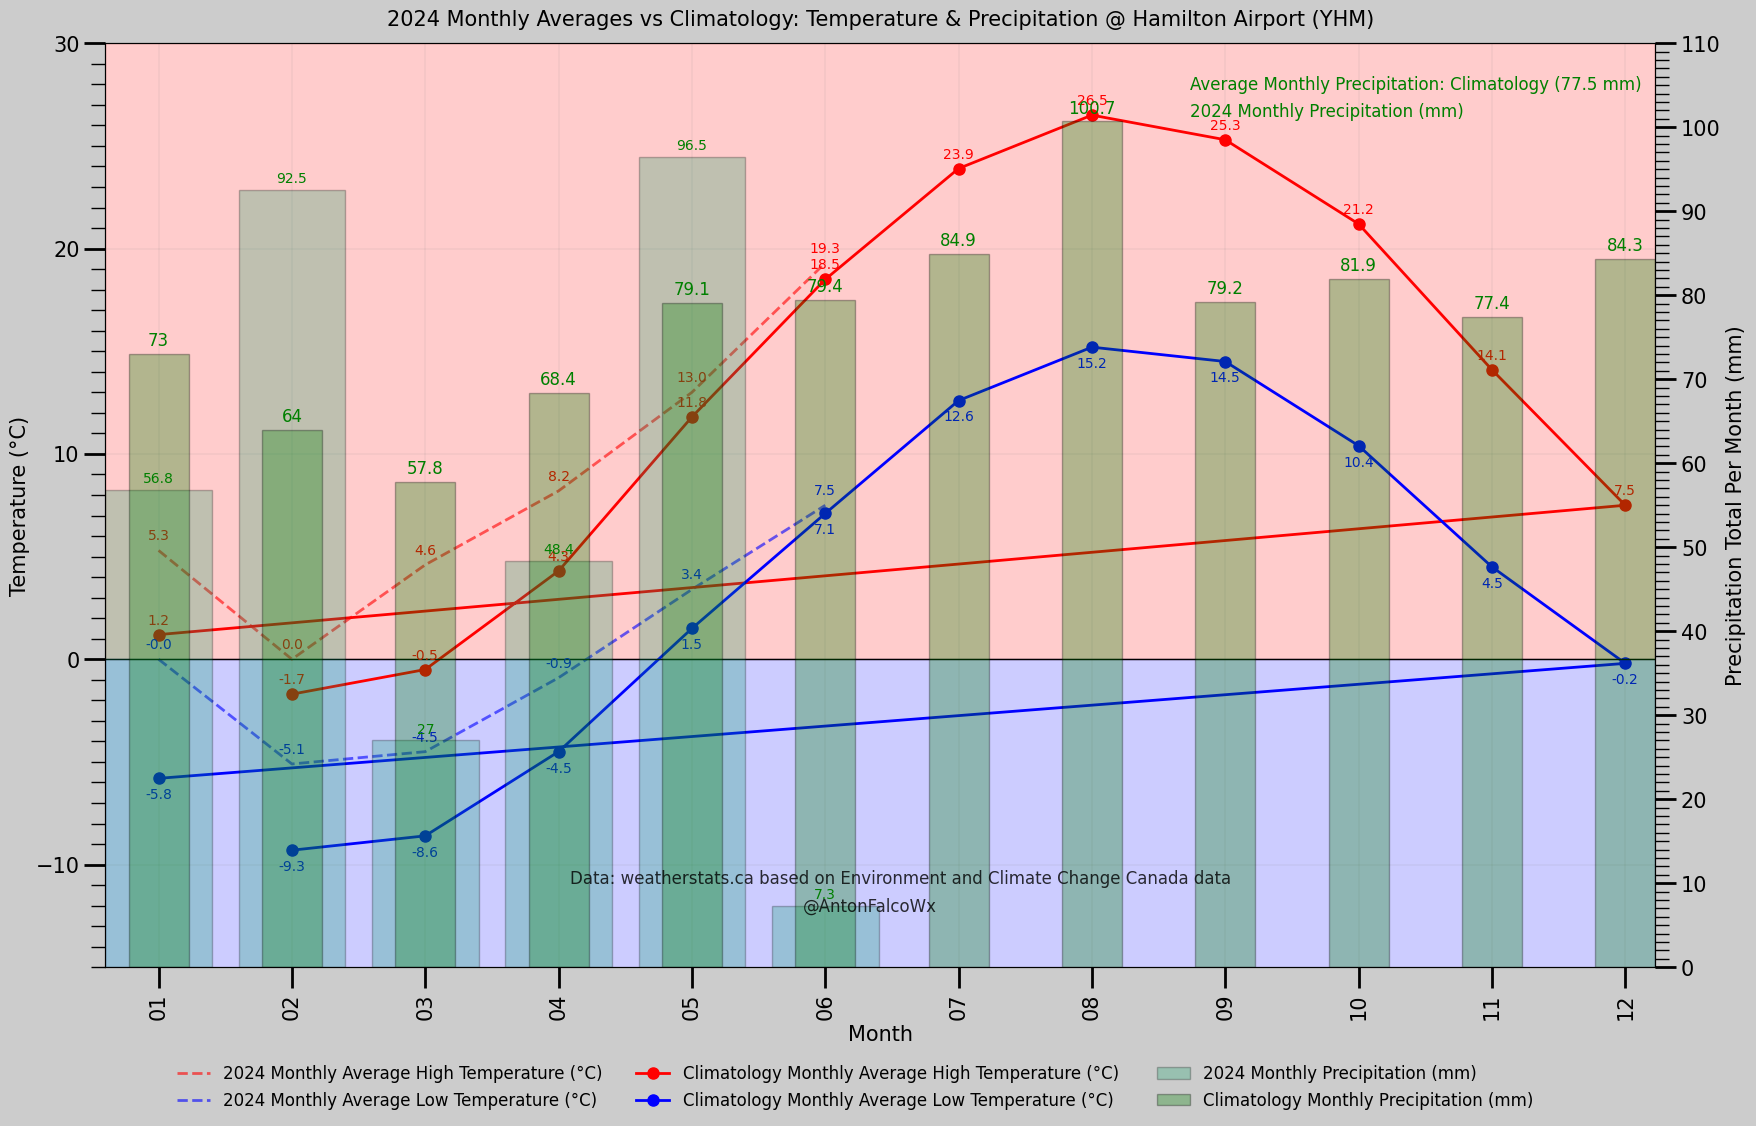

In [88]:
#2024 Monthly Averages vs Climatology Sheet

fig, ax = plt.subplots(figsize=(20,12)) 
ax2 = ax.twinx()
#ax.set_facecolor('#DEDEDE')
fig.patch.set_facecolor('#ccc')

#Line Graph and Annotations (FOR 2024)
Months = (monthly_averages['Month'])
Max = (monthly_averages['max_temperature'])
Min = (monthly_averages['min_temperature'])

#Temperature plots and labels (FOR 2024)
ax.plot(monthly_averages['Month'], monthly_averages['max_temperature'], '--', ms=8, color='red', linewidth=2.0, alpha=0.6)
for i, txt in enumerate(Max):
    ax.annotate(txt, (Months[i], Max[i]+0.5), ha='center', c='red', fontsize=10, fontweight='bold')

ax.plot(monthly_averages['Month'], monthly_averages['min_temperature'], '--', ms=8, color='blue', linewidth=2.0, alpha=0.6)
for i, txt in enumerate(Min):
    ax.annotate(txt, (Months[i], Min[i]+0.5), ha='center', c='blue', fontsize=10, fontweight='bold')

Precip = ax2.bar(monthly_averages['Month'], monthly_averages['precipitation'], alpha=0.25, color='#009E60', edgecolor='black')
plt.bar_label(Precip, padding=3, fontsize=10, fontweight='bold', color='g')



#Temperature plots and labels (FOR CLIMATOLOGY)
Month = (Climatology['Month'])
Max = (Climatology['Daily Maximum Temperature'])
Min = (Climatology['Daily Minimum Temperature'])
Average = (Climatology['Daily Average Temperature'])

#Monthly Max
ax.plot(Climatology['Month'], Climatology['Daily Maximum Temperature'], '-o', ms=8, color='red', linewidth=2.0)  
for i, txt in enumerate(Max):
    ax.annotate(txt, (Month[i], Max[i]+0.5), ha='center', c='red', fontsize=10)

#Monthly Min
ax.plot(Climatology['Month'], Climatology['Daily Minimum Temperature'], '-o', ms=8, color='blue', linewidth=2.0)
for i, txt in enumerate(Min):
    ax.annotate(txt, (Month[i], Min[i]-1), ha='center', c='blue', fontsize=10)

#Precipitation Bar and Label
#ax2.bar(data['Month'], data['Precipitation (mm)'],alpha=0.4, color='g')
Precip = ax2.bar(Climatology['Month'], Climatology['Precipitation'], alpha=0.3, color='g', width=0.45, edgecolor='black')
plt.bar_label(Precip, padding=3, fontsize=12, color='g') #,label_type='center'



#Labels
ax.grid(which='major', color='gray', linewidth=0.15, alpha=0.75)
ax.set_title('2024 Monthly Averages vs Climatology: Temperature & Precipitation @ Hamilton Airport (YHM)', y=1.01, fontweight='bold', fontsize=15)
ax.set_xlabel('Month',fontweight='bold', fontsize=15)
ax.set_ylabel('Temperature (°C)',fontweight='bold', fontsize=15)
ax2.set_ylabel('Precipitation Total Per Month (mm)', fontweight='bold', fontsize=15)

#Temperature & Month X/Y-axis
ax.margins(x=0)
ax.margins(y=0)
ax.set_ylim([-15, 30])
ax2.set_ylim([0, 110])

ax.legend(["2024 Monthly Average High Temperature (°C)", "2024 Monthly Average Low Temperature (°C)", "Climatology Monthly Average High Temperature (°C)",  "Climatology Monthly Average Low Temperature (°C)"],
          fontsize=12, loc='lower center', bbox_to_anchor=(0.35, -0.17), ncol=2, frameon=False)
ax2.legend(["2024 Monthly Precipitation (mm)", "Climatology Monthly Precipitation (mm)"], loc='lower center', bbox_to_anchor=(0.8, -0.17), ncol=1, fontsize=12, frameon=False)


#Changing the x and y axis intervals (ticks)
ax.xaxis.set_minor_locator(MultipleLocator())
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_major_locator(MultipleLocator(10))
ax2.yaxis.set_minor_locator(MultipleLocator())
ax2.yaxis.set_major_locator(MultipleLocator(10))

#Longer Ticks
ax.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax2.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax2.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax.tick_params(axis='x', rotation=90)

date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

#Adding name and two line labels
plt.text(0.45, 0.06, '@AntonFalcoWx', fontsize = 12, transform=ax.transAxes, alpha=0.8)
plt.text(0.30, 0.09, 'Data: weatherstats.ca based on Environment and Climate Change Canada data', fontsize = 12, transform=ax.transAxes, alpha=0.8)
plt.text(0.7, 0.95, 'Average Monthly Precipitation: Climatology (77.5 mm)', fontsize = 12, color='green', transform=ax.transAxes)
plt.text(0.7, 0.92, '2024 Monthly Precipitation (mm)', fontsize = 12, color='green', transform=ax.transAxes)


#Average lines (Average Temperature and Average Precip)
ax.axhline(0, 0, 28,color='black',linewidth=1.0,linestyle='solid')
#ax2.axhline(77.5,0,28,color='green',linewidth=2.0,linestyle='dashed',alpha=0.3) #CLIMATOLOGY
#ax2.axhline(82.5,0,28,color='green',linewidth=2.0,linestyle='dashed',alpha=0.4) #2023


#Shaded background (Background Red)
ax.axhspan(30, 0, alpha=0.2, color='r')

#Shaded background (Background Blue)
ax.axhspan(-20, 0, alpha=0.2, color='b')

#plt.savefig('YHM_Normals vs monthly_averages.jpg', dpi=300)
plt.show()
plt.close()

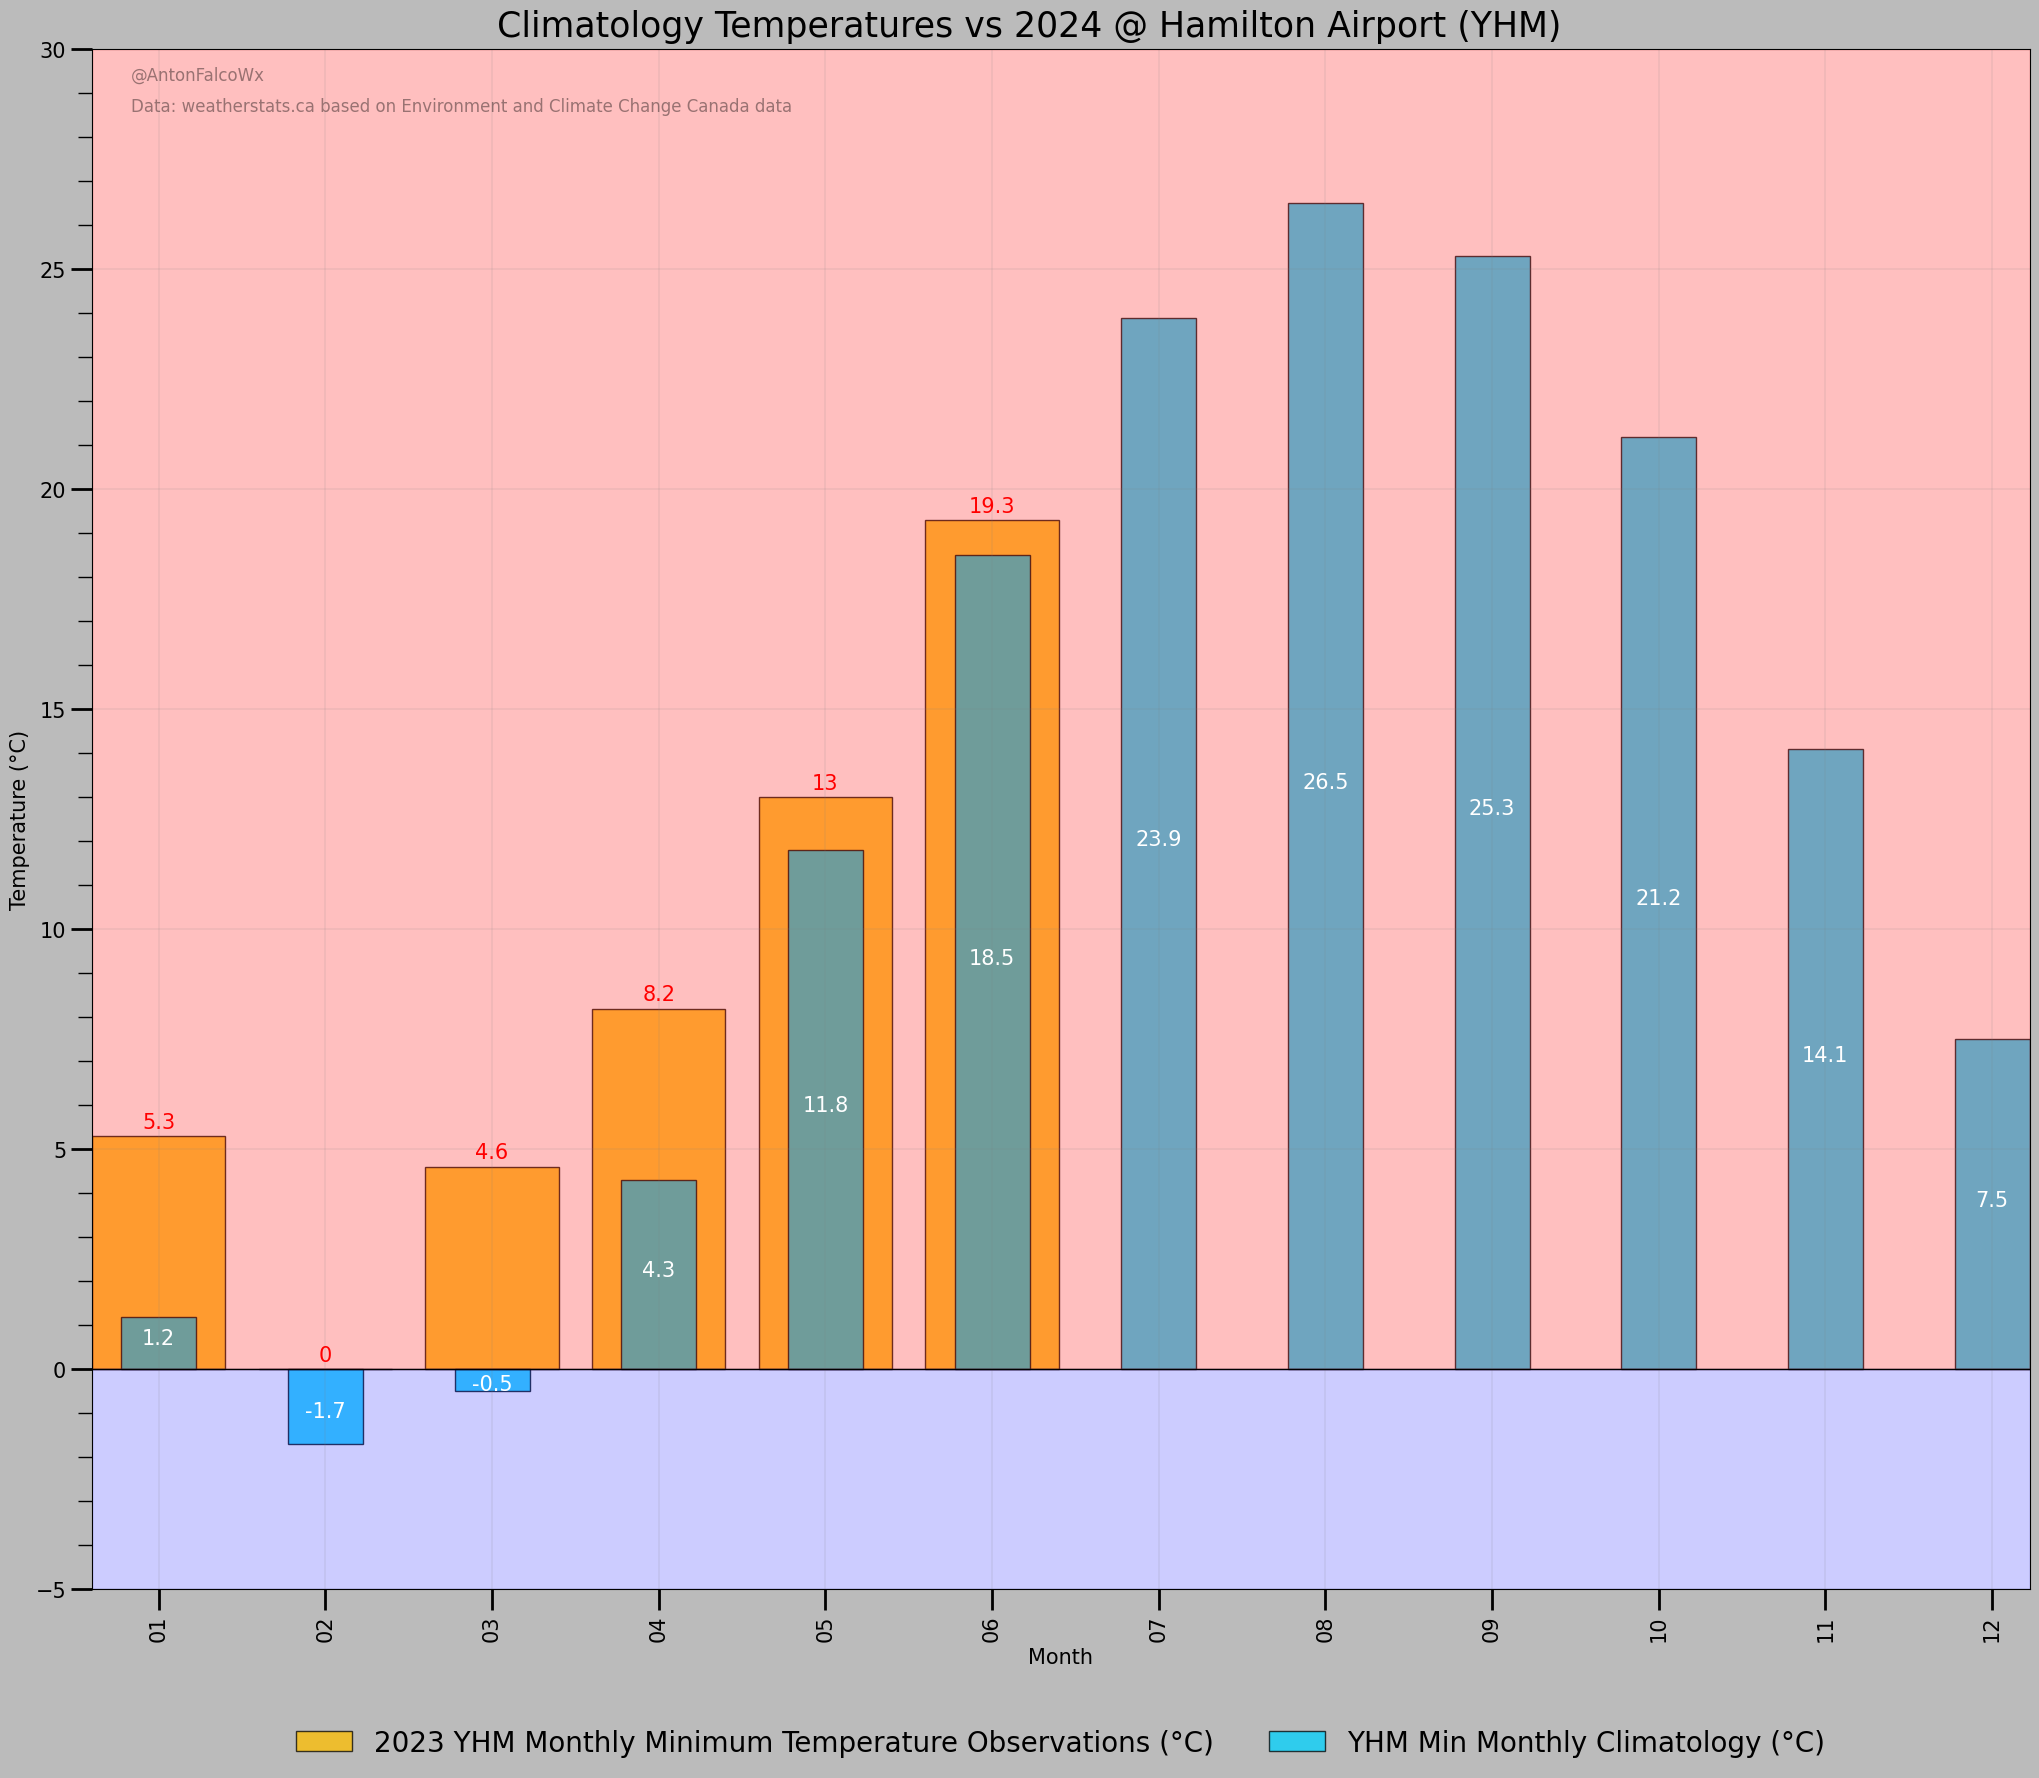

In [89]:
#Overlapping Highs and Lows
fig, ax = plt.subplots(figsize=(25,20))
fig.suptitle('Climatology Temperatures vs 2024 @ Hamilton Airport (YHM)',  y=.9, fontweight='bold', fontsize=25)
#ax.set_facecolor('#DEDEDE')
fig.patch.set_facecolor('#bbb')


#Temperature Bar and Label (2023)
Max_Temps_2023 = ax.bar(monthly_averages['Month'], monthly_averages['max_temperature'], alpha=0.75, color='#FFBF00', edgecolor='black')
plt.bar_label(Max_Temps_2023, padding=3, fontsize=15, fontweight='bold', color='r')

#Temperature Bar and Label (Climatology)
Temps = ax.bar(Climatology['Month'], Climatology['Daily Maximum Temperature'], alpha=0.75, color='#00d2ff', width=0.45, edgecolor='black')
plt.bar_label(Temps, padding=3, fontsize=15, color='white', label_type='center')


#Min Temperature Bar and Label (2023)
#Min_Temps_2023 = ax.bar(monthly_averages['Month'], monthly_averages['min_temperature'], alpha=0.75, color='#FFBF00', edgecolor='black')
#plt.bar_label(Min_Temps_2023, padding=3, fontsize=15, fontweight='bold', color='r')
#
##Min Temperature Bar and Label (Climatology)
#Temps = ax.bar(Climatology['Month'], Climatology['Daily Minimum Temperature'], alpha=0.75, color='#00d2ff', width=0.45,edgecolor='black')
#plt.bar_label(Temps, padding=3, fontsize=15, color='white', label_type='center')


#Legends (MAX)
ax.legend(["2023 YHM Monthly Maximum Temperature Observations (°C)", "YHM Max Monthly Climatology (°C)"], 
          fontsize=20, loc='lower center', bbox_to_anchor=(0.5, -0.125), ncol=2, frameon=False)

#Legends (MIN)
ax.legend(["2023 YHM Monthly Minimum Temperature Observations (°C)", "YHM Min Monthly Climatology (°C)"], 
          fontsize=20, loc='lower center', bbox_to_anchor=(0.5, -0.125), ncol=2, frameon=False)


#Labels (right plot)
ax.grid(which='major', color='gray', linewidth=0.15)
ax.set_xlabel('Month',fontweight='bold', fontsize=15)
ax.set_ylabel('Temperature (°C)',fontweight='bold', fontsize=15)


#Temperature & Day X/Y-axis
ax.margins(x=0)
ax.margins(y=0)
ax.set_ylim([-5, 30])


#Changing the x and y axis intervals (ticks)
ax.xaxis.set_minor_locator(MultipleLocator())
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_major_locator(MultipleLocator(5))


#Longer Ticks
ax.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax.tick_params(axis='x', rotation=90)


#Average lines (Average Temperature and Average Precip)
ax.axhline(0,0,28,color='black',linewidth=1.0,linestyle='solid')


#Adding name 
plt.text(0.02, 0.98, '@AntonFalcoWx', fontsize = 12, transform=ax.transAxes, alpha=0.4)
plt.text(0.02, 0.96, 'Data: weatherstats.ca based on Environment and Climate Change Canada data', fontsize = 12, transform=ax.transAxes, alpha=0.4)

#Shaded background (red)
ax.axhspan(30, 0, alpha=0.25, color='r')

#Shaded background (blue)
ax.axhspan(-5, 0, alpha=0.2, color='b')


#Date formatter
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)


#plt.savefig('YHM_Normals vs December Bar Graph (Overlap).jpg', dpi=300)
plt.show()
plt.close()

In [90]:
#Un-Comment to use for monthly health breakdown
Yearly = pd.read_excel(r'C:\Users\Anton\Desktop\Visualization\YHM Reports\YHM 2024\Yearly.xlsx')
Yearly = Yearly[(Yearly['date'] >= '2024-04-01') & (Yearly['date'] < '2024-05-01')].reset_index()   
Yearly.tail(10)

#For Highest Health Index Monthly
Highest_Health = Yearly['max_health_index'].max()  
Date_Highest_Health = Yearly.loc[Yearly['max_health_index'].idxmax(), 'date'].date()
print(f"Highest Health Index = {Highest_Health:.2f} on {Date_Highest_Health}")

#For Monthly Average
Monthly_Health = Yearly['avg_health_index'].mean() 
print(f"Monthly Average Health Index = {Monthly_Health:.2f}")

Highest Health Index = 5.20 on 2024-04-27
Monthly Average Health Index = 2.82


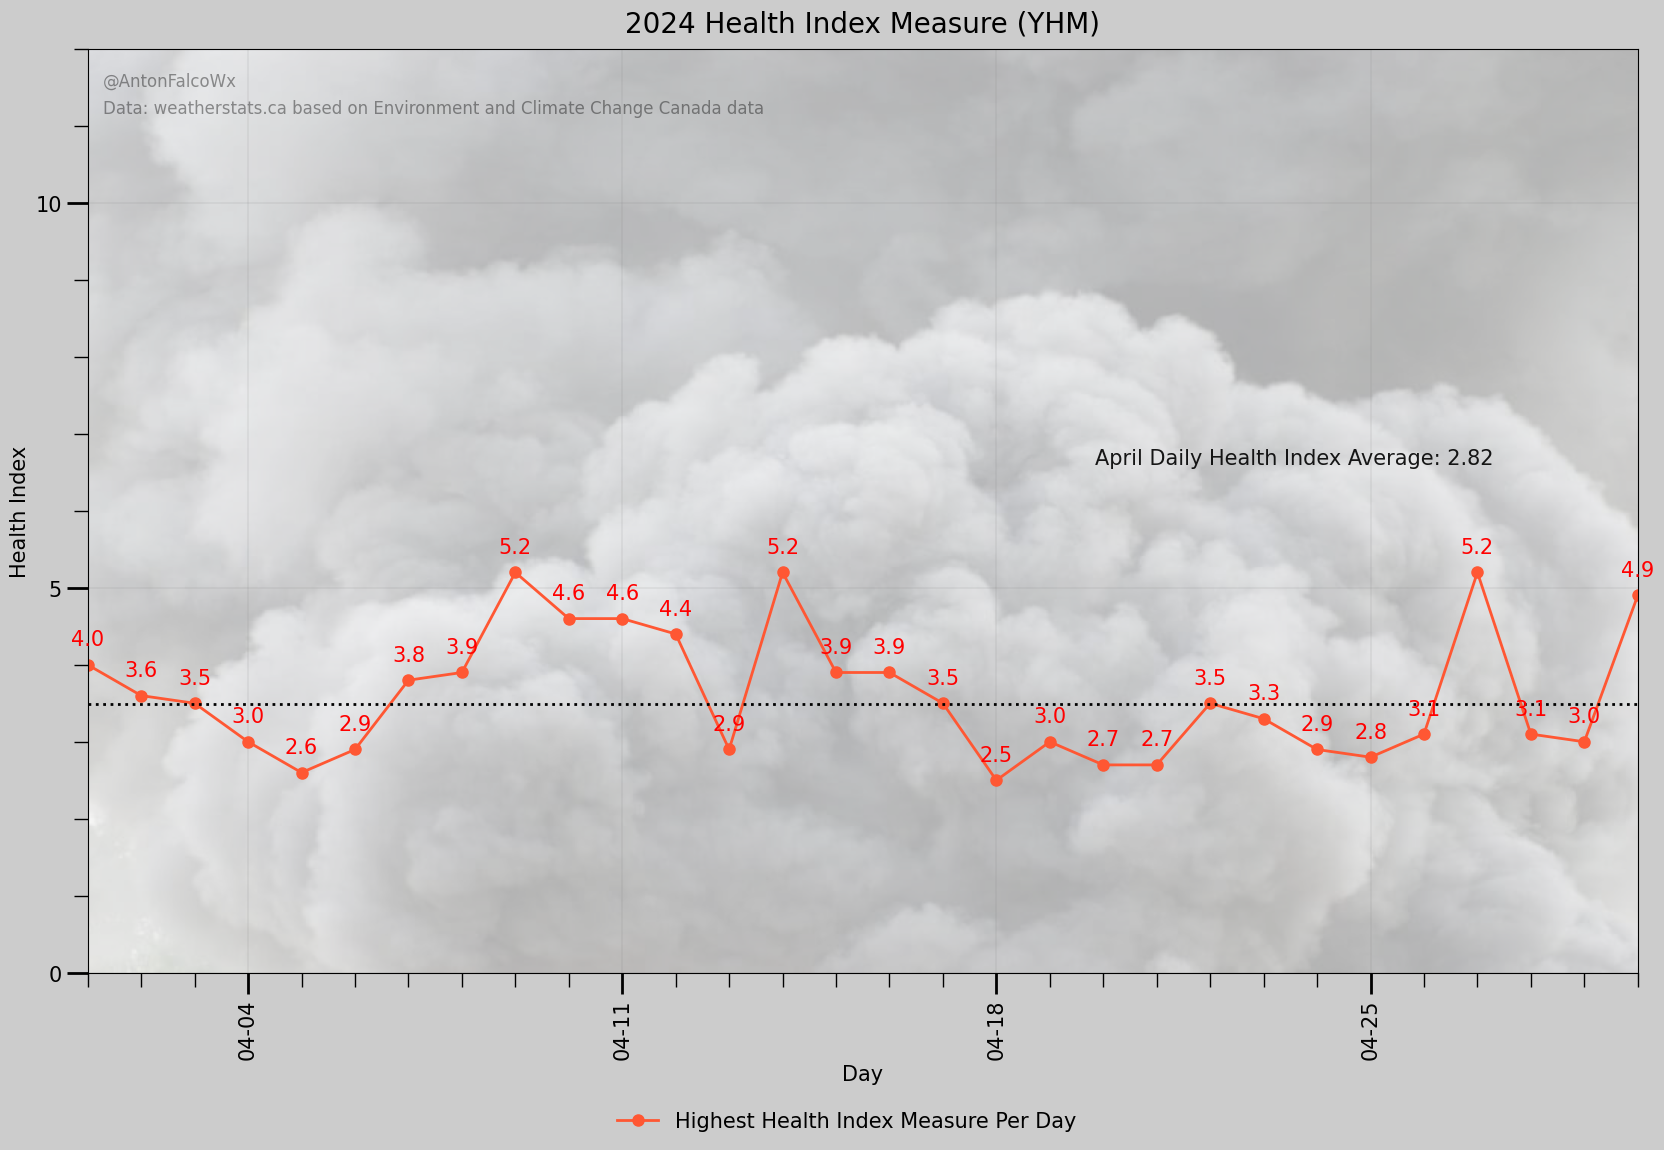

In [91]:
#HEALTH INDEX: LINE

fig, ax = plt.subplots(figsize=(20,12)) 
#ax.set_facecolor('#DEDEDE')
fig.patch.set_facecolor('#ccc')

#Background Image
Day = (Yearly['date'])
health = (Yearly['max_health_index'])

img_extent = [min(Day), max(Day), 0, 12]
img = mpimg.imread(r'C:\Users\Anton\Desktop\Visualization\smoke.jpg')
ax.imshow(img, extent=img_extent, aspect='auto', alpha=0.35)


#Line Graph and Annotations
Date = (Yearly['date'])
Max_Health = (Yearly['max_health_index'])

#Temperature plots and labels
ax.plot(Yearly['date'], Yearly['max_health_index'], '-o', ms=8, color='#FF5733', linewidth=2.0)
for i, txt in enumerate(Max_Health):
    ax.annotate(txt, (Date[i], Max_Health[i]+0.25), ha='center', c='red', fontsize=15) #fontweight='bold'

#Labels
ax.grid(which='major', color='gray', linewidth=0.15)
ax.set_title('2024 Health Index Measure (YHM)', y=1.01, fontweight='bold', fontsize=20)
ax.set_xlabel('Day',fontweight='bold', fontsize=15)
ax.set_ylabel('Health Index',fontweight='bold', fontsize=15)

#Temperature & Day X/Y-axis
ax.margins(x=0)
ax.margins(y=0)
ax.set_ylim([0, 12])

Monthly_Health = Yearly['avg_health_index'].mean() 

#Legends 
ax.legend(["Highest Health Index Measure Per Day"],fontsize=15, loc=1, bbox_to_anchor=(0.65, -0.13), ncol=2, frameon=False)


#Changing the x and y axis intervals (ticks)
ax.xaxis.set_minor_locator(MultipleLocator())
ax.xaxis.set_major_locator(MultipleLocator(7))
ax.yaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_major_locator(MultipleLocator(5))

#Longer Ticks
ax.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax.tick_params(axis='x', rotation=90)

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

#Adding name and two line labels
plt.text(0.01, 0.96, '@AntonFalcoWx', fontsize = 12, transform=ax.transAxes, alpha=0.4)
plt.text(0.01, 0.93, 'Data: weatherstats.ca based on Environment and Climate Change Canada data', fontsize = 12, transform=ax.transAxes, alpha=0.4)
#plt.text(0.2, 0.6, '2024 Daily Health Index Average: April to August (4.2)',color='red', fontsize = 10, transform=ax.transAxes, alpha=0.9)
plt.text(0.65, 0.55, 'April Daily Health Index Average: 2.82',color='black', fontsize = 15, transform=ax.transAxes, alpha=0.9)
#plt.text(0.58, 0.95, 'Wildfire Smoke (gray)', color='black', fontsize=10, transform=ax.transAxes)

#Average lines (Average Temperature and Average Precip)
ax.axhline(3.49,0,28,color='black', linewidth=2.0, linestyle='dotted')

#Shaded background (Background Red)
#ax.axhspan(12, 0, alpha=0.2, color='r')

#Vertical Shading (smoke)
#start_date = dt.datetime(2024, 6, 5)
#end_date = dt.datetime(2024, 6, 8)
#ax.axvspan(start_date, end_date, alpha=0.6, color='gray')
#
#start_date = dt.datetime(2024, 6, 28)
#end_date = dt.datetime(2024, 6, 29)
#ax.axvspan(start_date, end_date, alpha=0.6, color='gray')

#plt.savefig('YHM_Health_Normals', dpi=300)
plt.show()
plt.close()

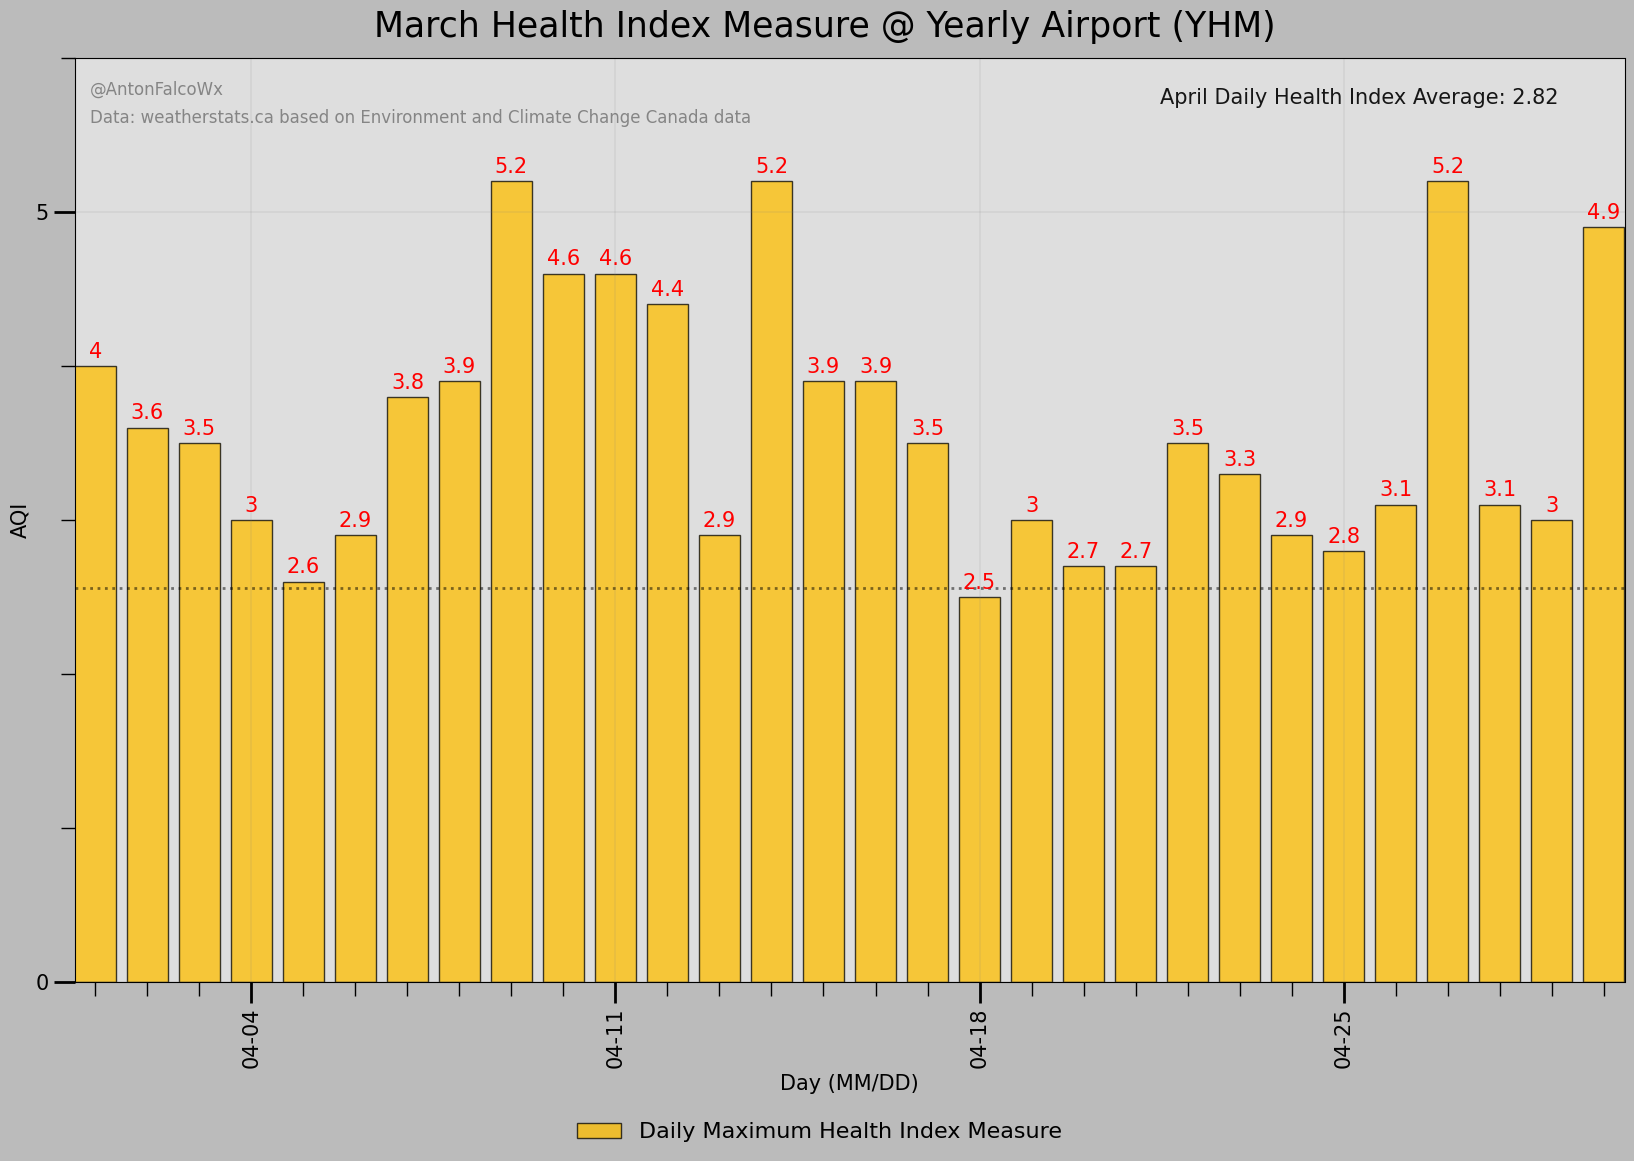

In [92]:
#SPECIFIC TIME FRAME HEALTH INDEX: BAR
fig, ax = plt.subplots(figsize=(20,12))
fig.suptitle('March Health Index Measure @ Yearly Airport (YHM)',  y=.92, fontweight='bold', fontsize=25)
ax.set_facecolor('#DEDEDE')
fig.patch.set_facecolor('#bbb')


#Vertical layout
#fig, (ax, ax2) = plt.subplots(2, figsize=(18,15))
#ax.plot(1, 2)
#ax2.plot(1, -2)
#fig.suptitle('June High and Low Temperatures @ Yearly Airport (YHM)', y=.90, fontweight='bold', fontsize=20) #y=.90 adjusts title
#ax.set_facecolor('#DEDEDE')
#ax2.set_facecolor('#DEDEDE')
#fig.patch.set_facecolor('#bbb')


##Background Image
#Day = (Yearly['date'])
#Health = (Yearly['max_health_index'])
#
#img_extent = [min(Day), max(Day), 0, 12]
#img = mpimg.imread(r'C:\Users\Anton\Desktop\Visualization\smoke.jpg')
#ax.imshow(img, extent=img_extent, aspect='auto', alpha=0.35)


#Bar Plot
Day = (Yearly['date'])
Max_Health = (Yearly['max_health_index'])

rects1 = ax.bar((Yearly['date']), Yearly['max_health_index'], width=0.8, label='Max', color='#FFBF00', alpha=0.75, edgecolor='black')
plt.bar_label(rects1, padding=3, fontsize=15, color='red', label_type='edge', fontweight='bold')  # rotation=270,


#Legends 
ax.legend(["Daily Maximum Health Index Measure"],fontsize=16, loc=1, bbox_to_anchor=(0.65, -0.13), ncol=2, frameon=False)


#Labels (right plot)
ax.grid(which='major', color='gray', linewidth=0.15)
ax.set_xlabel('Day (MM/DD)',fontweight='bold', fontsize=15)
ax.set_ylabel('AQI',fontweight='bold', fontsize=15)


#Temperature & Day X/Y-axis
ax.margins(x=0)
ax.margins(y=0)
ax.set_ylim([0, 6])

#Changing the x and y axis intervals (ticks)
ax.xaxis.set_minor_locator(MultipleLocator())
ax.xaxis.set_major_locator(MultipleLocator(7))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(5))

#Longer Ticks
ax.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax.tick_params(axis='x', rotation=90)

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

#Adding name and two line labels
plt.text(0.01, 0.96, '@AntonFalcoWx', fontsize = 12, transform=ax.transAxes, alpha=0.4)
plt.text(0.01, 0.93, 'Data: weatherstats.ca based on Environment and Climate Change Canada data', fontsize = 12, transform=ax.transAxes, alpha=0.4)
plt.text(0.7, 0.95, 'April Daily Health Index Average: 2.82',color='black', fontsize = 15, transform=ax.transAxes, alpha=0.9)
#plt.text(0.69, 0.87, 'Notable Wildfire Smoke Events: Highlighted Gray', color='black', fontsize=12, transform=ax.transAxes)

#Average lines (Average Health Index)
ax.axhline(2.56,0,28,color='black', linewidth=2.0, linestyle='dotted', alpha=0.5)

#Shaded background (Background Red)
#ax.axhspan(11.5, 0, alpha=0.2, color='r')

#Vertical Shading (smoke)
#start_date = dt.datetime(2024, 6, 5)
#end_date = dt.datetime(2024, 6, 8)
#ax.axvspan(start_date, end_date, alpha=0.7, color='gray')
#
#start_date = dt.datetime(2024, 6, 27)
#end_date = dt.datetime(2024, 7, 2)
#ax.axvspan(start_date, end_date, alpha=0.7, color='gray')


#Date formatter
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)


#plt.savefig('YHM May through August Smoke.jpg', dpi=300)
plt.show()
plt.close()

In [93]:
#INDIVIDUAL MONTHS: https://hamilton.weatherstats.ca/download.html (LOOK FOR CLIMATE DAILY AND DOWNLOAD PER MONTH)
Yearly = pd.read_excel(r'C:\Users\Anton\Desktop\Visualization\YHM Reports\YHM 2024\Yearly.xlsx')
#Yearly = Yearly[(Yearly['date'] >= '2024-01-01') & (Yearly['date'] < '2024-02-01')].reset_index() 
#Yearly = Yearly[(Yearly['date'] >= '2024-02-01') & (Yearly['date'] < '2024-03-01')].reset_index() 
#Yearly = Yearly[(Yearly['date'] >= '2024-03-01') & (Yearly['date'] < '2024-04-01')].reset_index()   
Yearly = Yearly[(Yearly['date'] >= '2024-04-01') & (Yearly['date'] < '2024-05-01')].reset_index()        
Yearly.tail(10)

#Normals found here: https://hamilton.weatherstats.ca/download.html (LOOK FOR 30 YEAR DAILY NORMALS AND DOWNLOAD PER MONTH)
Normals = pd.read_excel(r'C:\Users\Anton\Desktop\Visualization\YHM Reports\YHM 2024\Normals.xlsx')
#Normals = Normals[(Normals['date'] >= '2024-01-01') & (Normals['date'] < '2024-02-01')].reset_index()  
#Normals = Normals[(Normals['date'] >= '2024-02-01') & (Normals['date'] < '2024-03-01')].reset_index()  
#Normals = Normals[(Normals['date'] >= '2024-03-01') & (Normals['date'] < '2024-04-01')].reset_index()  
Normals = Normals[(Normals['date'] >= '2024-04-01') & (Normals['date'] < '2024-05-01')].reset_index()  
#Normals.head(10)

#Extremes found here: https://hamilton.weatherstats.ca/download.html (LOOK FOR 30 YEAR DAILY EXTREMES AND DOWNLOAD PER MONTH)
Extremes = pd.read_excel(r'C:\Users\Anton\Desktop\Visualization\YHM Reports\YHM 2024\Daily_Extremes.xlsx')
#Extremes = Extremes[(Extremes['date'] >= '2024-01-01') & (Extremes['date'] < '2024-02-01')].reset_index() 
#Extremes = Extremes[(Extremes['date'] >= '2024-02-01') & (Extremes['date'] < '2024-03-01')].reset_index() 
#Extremes = Extremes[(Extremes['date'] >= '2024-03-01') & (Extremes['date'] < '2024-04-01')].reset_index() 
Extremes = Extremes[(Extremes['date'] >= '2024-04-01') & (Extremes['date'] < '2024-05-01')].reset_index() 
#Extremes.tail(10)

#Extremes.describe
#Extremes.info

In [100]:
#MONTHLY AVERAGE HIGH TEMPERATURE
Average_High = Yearly['max_temperature'].mean().round(2)
print(f"Monthly Average High Temperature = {Average_High}°C")

#MONTHLY AVERAGE LOW TEMPERATURE
Average_Low = Yearly['min_temperature'].mean().round(2)
print(f"Monthly Average Low Temperature = {Average_Low}°C")

#DEPARTURE FROM AVERAGE HIGH (MAKE SURE TO CHANGE MONTHLY VALUES AFTER MEAN)
Average_High = Yearly['max_temperature'].mean() - 11.8
print(f"Monthly Average High Departure From Normal = {Average_High:.2f}°C")

#DEPARTURE FROM AVERAGE LOW (MAKE SURE TO CHANGE MONTHLY VALUES AFTER MEAN)
Average_Low = Yearly['min_temperature'].mean()- 1.5
print(f"Monthly Average Low Departure From Normal = {Average_Low:.2f}°C")

#HIGHEST MAX TEMP
Highest_Temp = Yearly['max_temperature'].max()
Date_Highest_Temp = Yearly.loc[Yearly['max_temperature'].idxmax(), 'date'].strftime('%m-%d')
print(f"Highest High Temperature = {Highest_Temp}°C on {Date_Highest_Temp}")

#HIGHEST HUMIDEX
Highest_Humidex = Yearly['max_humidex'].max()
Date_Highest_Humidex = Yearly.loc[Yearly['max_humidex'].idxmax(), 'date'].strftime('%m-%d')
print(f"Highest Humidex = {Highest_Humidex}°C on {Date_Highest_Humidex}")

#LOWEST MAX TEMP
Lowest_High = Yearly['max_temperature'].min()
Date_Lowest_High = Yearly.loc[Yearly['max_temperature'].idxmin(), 'date'].strftime('%m-%d')
print(f"Lowest High Temperature = {Lowest_High}°C on {Date_Lowest_High}")

#HIGHEST LOW TEMP
Highest_Low = Yearly['min_temperature'].max()
Date_Highest_Low_Temp = Yearly.loc[Yearly['min_temperature'].idxmax(), 'date'].strftime('%m-%d')
print(f"Highest Low Temperature = {Highest_Low}°C on {Date_Highest_Low_Temp}")

#LOWEST LOW TEMP
Low_Low = Yearly['min_temperature'].min()
Date_Low_Low = Yearly.loc[Yearly['min_temperature'].idxmin(), 'date'].strftime('%m-%d')
print(f"Lowest Low Temperature = {Low_Low}°C on {Date_Low_Low}")

#LOWEST WIND CHILL
Lowest_Windchill = Yearly['min_windchill'].min()
Date_Low_Windchill = Yearly.loc[Yearly['min_windchill'].idxmin(), 'date'].strftime('%m-%d')
print(f"Lowest Windchill = {Lowest_Windchill}°C on {Date_Low_Windchill}")

#LARGEST MAX TEMPERATURE CHANGE (HIGHS)
Yearly['day_to_day_max_change'] = Yearly['max_temperature'].diff()
max_day_change = Yearly.loc[Yearly['day_to_day_max_change'].idxmax()]
date_max_day_change = max_day_change['date'].strftime('%m-%d')
max_day_temperature_change = max_day_change['day_to_day_max_change']
print(f"Largest 24 Hour High Temperature Change = {max_day_temperature_change:.1f}°C on {date_max_day_change}")

#LARGEST MIN TEMPERATURE CHANGE (LOWS)
Yearly['day_to_day_min_change'] = Yearly['min_temperature'].diff()
min_day_change = Yearly.loc[Yearly['day_to_day_min_change'].idxmin()]
date_min_day_change = min_day_change['date'].strftime('%m-%d')
min_day_temperature_change = min_day_change['day_to_day_min_change']
print(f"Largest 24 Hour Low Temperature Change = {min_day_temperature_change:.1f}°C on {date_min_day_change}")

#LARGEST HIGH TO LOW TEMPERATURE CHANGE IN A DAY
Yearly['high_to_low_difference'] = Yearly['max_temperature'] - Yearly['min_temperature']
max_high_to_low_difference = Yearly.loc[Yearly['high_to_low_difference'].idxmax()]
date_max_high_to_low_difference = max_high_to_low_difference ['date'].strftime('%m-%d')
max_high_to_low_difference = max_high_to_low_difference ['high_to_low_difference']
print(f"Largest 24 Hour Overall Temperature Change = {max_high_to_low_difference:.1f}°C on {date_max_high_to_low_difference}")

#HIGHEST SUSTAINED WIND
Highest_Sustained_Wind = Yearly['max_wind_speed'].max()
Date_Highest_Wind = Yearly.loc[Yearly['max_wind_speed'].idxmax(), 'date'].strftime('%m-%d')
print(f"Highest Sustained Wind Speed = {Highest_Sustained_Wind} km/h on {Date_Highest_Wind}")

#HIGHEST WIND GUST
Highest_Wind_Gust = Yearly['max_wind_gust'].max()
Date_Highest_Gust = Yearly.loc[Yearly['max_wind_gust'].idxmax(), 'date'].strftime('%m-%d')
print(f"Highest Recorded Wind Gust = {Highest_Wind_Gust:.0f} km/h on {Date_Highest_Wind}")

#HIGHEST BAROMETRIC PRESSURE
Highest_Pressure = Yearly['max_pressure_sea'].max() *10
Date_Highest_Pressure = Yearly.loc[Yearly['max_pressure_sea'].idxmax(), 'date'].strftime('%m-%d')
print(f"Highest Barometric Pressure = {Highest_Pressure:.1f} mbar on {Date_Highest_Pressure}")

#LOWEST BAROMETRIC PRESSURE
Lowest_Pressure = Yearly['min_pressure_sea'].min() *10
Date_Lowest_Pressure = Yearly.loc[Yearly['min_pressure_sea'].idxmin(), 'date'].date()
print(f"Lowest Barometric Pressure = {Lowest_Pressure:.1f} mbar on {Date_Lowest_Pressure}")

#TOTAL Yearly PRECIP
Total = Yearly['precipitation'].sum()
print(f"Total Monthly Precipitation = {Total:.1f} mm")

#TOTAL Yearly RAIN
Total_Rain = Yearly['rain'].sum()
print(f"Total Monthly Rain = {Total_Rain:.1f} mm")

#TOTAL Yearly SNOW
Total_Snow = Yearly['snow'].sum()
print(f"Total Monthly Snow = {Total_Snow:.1f} cm")

#HIGHEST DAY PRECIPITATION TOTAL
Highest_Precip = Yearly['precipitation'].max() 
Date_Highest_Precipitation = Yearly.loc[Yearly['precipitation'].idxmax(), 'date'].strftime('%m-%d')
print(f"Highest Precipitation Day = {Highest_Precip} mm on {Date_Highest_Precipitation}")

#HIGHEST DAY RAIN TOTAL
Highest_Rain = Yearly['rain'].max()
Highest_Rain_Day = Yearly.loc[Yearly['rain'].idxmax(), 'date'].strftime('%m-%d')
print(f"Highest Rainfall Day = {Highest_Rain} mm on {Highest_Rain_Day}")

#HIGHEST DAY SNOW TOTAL
Highest_Snow = Yearly['snow'].max()
Highest_Snow_Day = Yearly.loc[Yearly['snow'].idxmax(), 'date'].strftime('%m-%d')
print(f"Highest Snowfall Day = {Highest_Snow} cm on {Highest_Snow_Day}")

#MAXIMUM SNOW ON GROUND
Yearly['snow_on_ground'].fillna(0, inplace=True)
Maximum_Snow = Yearly['snow_on_ground'].max()
if np.isnan(Maximum_Snow):
    Maximum_Snow = 0 
Maximum_Snow_Day = Yearly.loc[Yearly['snow_on_ground'].idxmax(), 'date'].strftime('%m-%d')
print(f"Maximum Snow On Ground = {Maximum_Snow} cm on {Maximum_Snow_Day}")

#For Highest Health Index Monthly
Highest_Health = Yearly['max_health_index'].max()
Date_Highest_Health = Yearly.loc[Yearly['max_health_index'].idxmax(), 'date'].strftime('%m-%d')
print(f"Monthly Highest Health Index = {Highest_Health:.1f} on {Date_Highest_Health}")

#For Monthly Average
Monthly_Health = Yearly['avg_health_index'].mean() 
print(f"Monthly Average Health Index = {Monthly_Health:.2f}")

Monthly Average High Temperature = 12.95°C
Monthly Average Low Temperature = 3.45°C
Monthly Average High Departure From Normal = 1.15°C
Monthly Average Low Departure From Normal = 1.95°C
Highest High Temperature = 23.8°C on 04-09
Highest Humidex = 26.0°C on 04-28
Lowest High Temperature = 3.9°C on 04-04
Highest Low Temperature = 12.6°C on 04-28
Lowest Low Temperature = -1.7°C on 04-25
Lowest Windchill = -7.0°C on 04-26
Largest 24 Hour High Temperature Change = 7.9°C on 04-23
Largest 24 Hour Low Temperature Change = -7.7°C on 04-27
Largest 24 Hour Overall Temperature Change = 21.2°C on 04-09
Highest Sustained Wind Speed = 53 km/h on 04-02
Highest Recorded Wind Gust = 73 km/h on 04-02
Highest Barometric Pressure = 1030.7 mbar on 04-25
Lowest Barometric Pressure = 983.4 mbar on 2024-04-12
Total Monthly Precipitation = 96.5 mm
Total Monthly Rain = 95.3 mm
Total Monthly Snow = 1.2 cm
Highest Precipitation Day = 25.6 mm on 04-11
Highest Rainfall Day = 25.6 mm on 04-11
Highest Snowfall Day = 

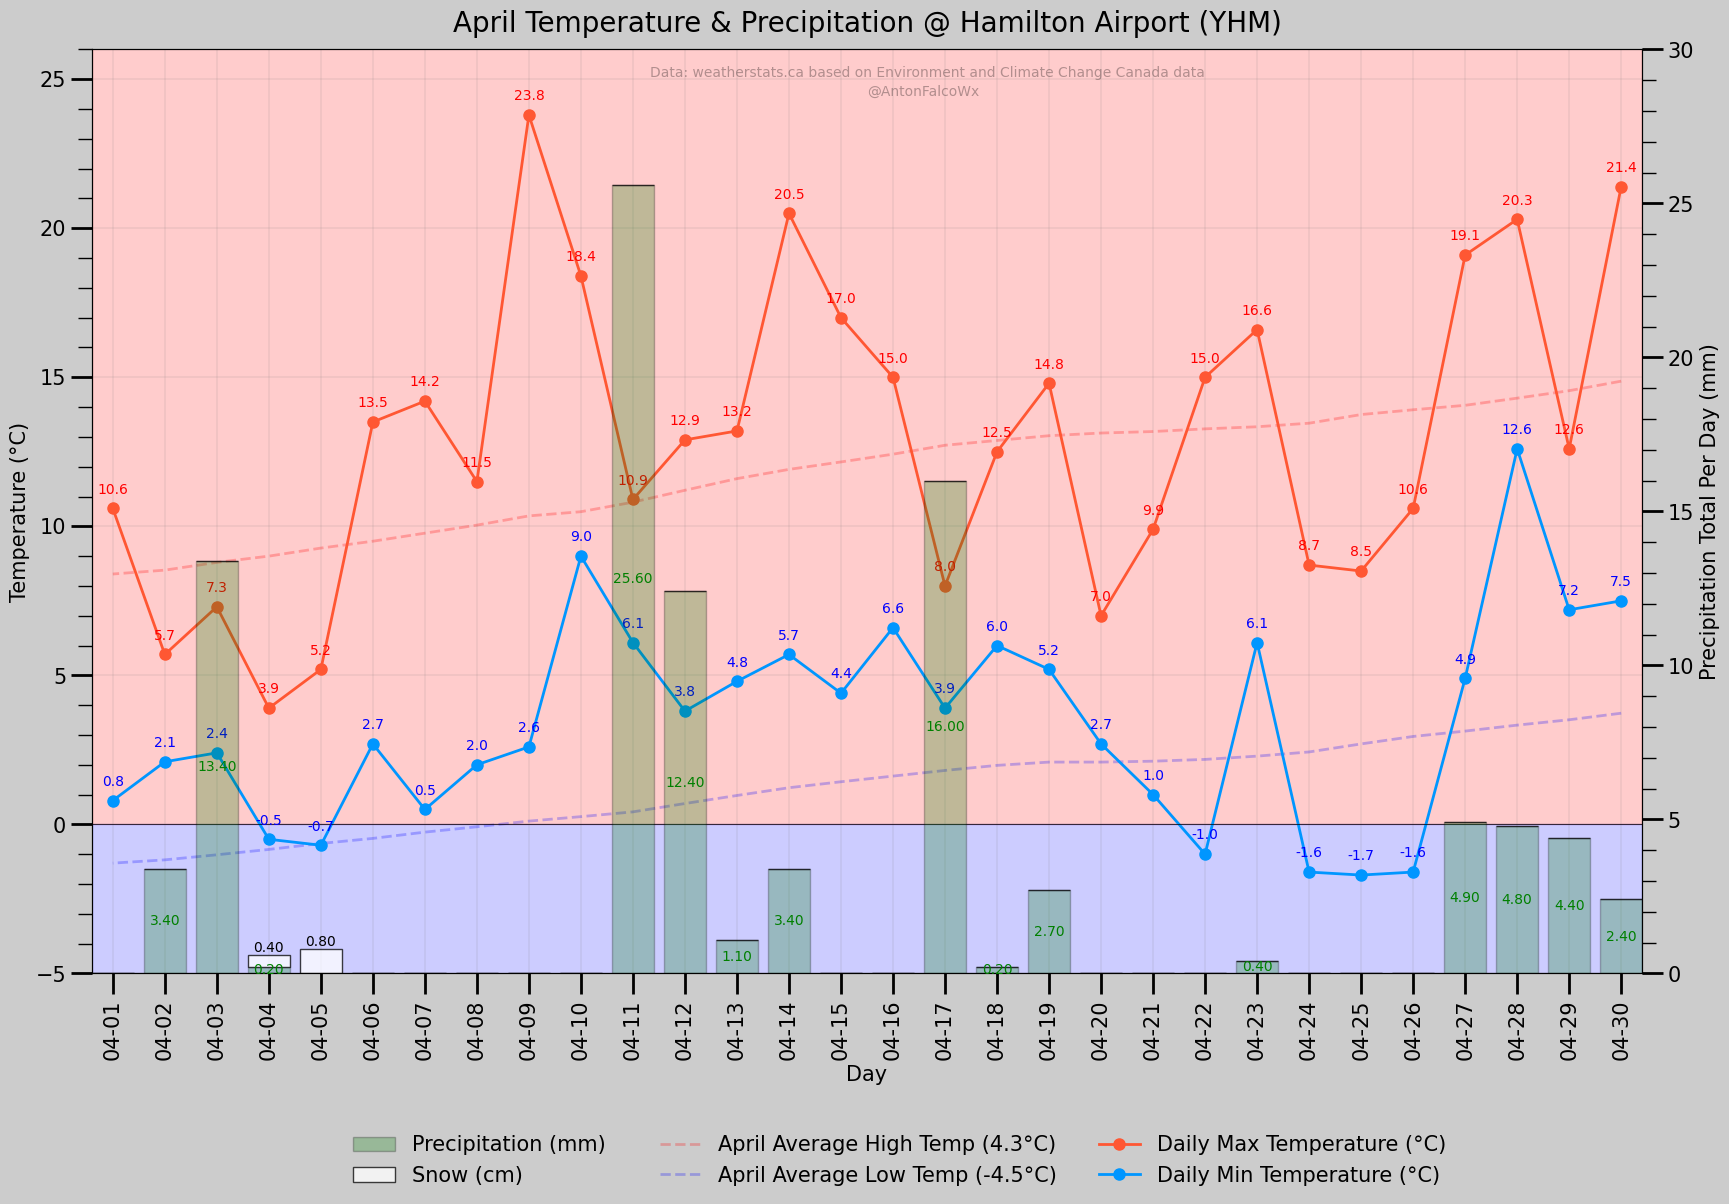

In [95]:
#Yearly PLOT
fig, ax = plt.subplots(figsize=(20,12)) 
ax2 = ax.twinx()
#ax.set_facecolor('#DEDEDE')
fig.patch.set_facecolor('#ccc')


#Line Graph and Annotations
Month = Yearly['date']
Max = Yearly['max_temperature']
Min = Yearly['min_temperature']


# Precipitation Bar
Precipitation = ax2.bar(Month, Yearly['rain'], alpha=0.25, color='g', label='Rainfall', edgecolor='black')
#plt.bar_label(Precip, padding=3, fontsize=12, label_type='center', color='g')

precip_labels = [f'{precip:.2f}' if precip > 0 else '' for precip in Yearly['rain']]
plt.bar_label(Precipitation, labels=precip_labels, label_type='center', fontweight='bold', color='green', fontsize=10)


# Snowfall Bar (Stacked on top of Precip)
Snowfall = ax2.bar(Month, Yearly['snow'], bottom=Yearly['rain'], alpha=0.75, color='white', label='Snowfall', edgecolor='black')  #width=0.5,
#plt.bar_label(Snowfall, padding=3, fontsize=12, label_type='edge', fontweight='bold', color='white')

snow_labels = [f'{snow:.2f}' if snow > 0 else '' for snow in Yearly['snow']]
plt.bar_label(Snowfall, labels=snow_labels, label_type='edge', fontweight='bold', color='black', fontsize=10)


#Precipitation Bar Graphs (Original, Non-Stacked)
#Precip = ax2.bar(Yearly['date'], Yearly['precipitation'], alpha=0.4, color='g')
#plt.bar_label(Precip, padding=3, fontsize=10, fontweight='bold', color='g')
#
#Snowfall = ax2.bar(Yearly['date'], Yearly['snow'], width=0.5, alpha=0.7, color='w')
#plt.bar_label(Snowfall, padding=3, fontsize=10, label_type='center', fontweight='bold', color='black')



#Yearly Normals plots and labels
ax.plot(Normals['date'], Normals['max_temperature_v'], '--', ms=5, color='red', linewidth=2.0, alpha=0.25)
ax.plot(Normals['date'], Normals['min_temperature_v'], '--', ms=5, color='b', linewidth=2.0, alpha=0.25)

#Temperature plots and labels
ax.plot(Yearly['date'], Yearly['max_temperature'], '-o', ms=8, color='#FF5733', linewidth=2.0)
for i, txt in enumerate(Max):
    ax.annotate(txt, (Month[i], Max[i]+0.5), ha='center', c='red', fontsize=10, fontweight='bold')

ax.plot(Yearly['date'], Yearly['min_temperature'], '-o', ms=8, color='#0096FF', linewidth=2.0)
for i, txt in enumerate(Min):
    ax.annotate(txt, (Month[i], Min[i]+0.5), ha='center', c='blue', fontsize=10, fontweight='bold')



#Labels
ax.grid(which='major', color='gray', linewidth=0.15)
ax.set_title('April Temperature & Precipitation @ Hamilton Airport (YHM)', y=1.01, fontweight='bold', fontsize=20)
ax.set_xlabel('Day',fontweight='bold', fontsize=15)
ax.set_ylabel('Temperature (°C)',fontweight='bold', fontsize=15)
ax2.set_ylabel('Precipitation Total Per Day (mm)', fontweight='bold', fontsize=15)


#Temperature & Day X/Y-axis
ax.margins(x=0)
ax.margins(y=0)
ax.set_ylim([-5, 26])
ax2.set_ylim([0, 30])

#Shaded background (Background Red)
ax.axhspan(40, 0, alpha=0.2, color='r')
ax.axhspan(0, -40, alpha=0.2, color='b')

#Vertical Shading (smoke)
#start_date = dt.datetime(2023, 7, 14)
#end_date = dt.datetime(2023, 7, 18)
#ax.axvspan(start_date, end_date, alpha=0.35, color='gray')


#Legends 
ax.legend(["April Average High Temp (4.3°C)", "April Average Low Temp (-4.5°C)", "Daily Max Temperature (°C)", "Daily Min Temperature (°C)"],fontsize=15, 
          loc='lower center', bbox_to_anchor=(0.62, -0.25), ncol=2, frameon=False)
ax2.legend(["Precipitation (mm)", "Snow (cm)"], fontsize=15, frameon=False, loc='lower center', bbox_to_anchor=(0.25, -0.25), ncol=1)


#Changing the x and y axis intervals (ticks)
ax.xaxis.set_minor_locator(MultipleLocator())
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_major_locator(MultipleLocator(5))
ax2.yaxis.set_minor_locator(MultipleLocator())
ax2.yaxis.set_major_locator(MultipleLocator(5))


#Longer Ticks
ax.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax2.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax2.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax.tick_params(axis='x', rotation=90)


date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)


#Adding name and two line labels
plt.text(0.5, 0.95, '@AntonFalcoWx', fontsize = 10, transform=ax.transAxes, alpha=0.3)
plt.text(0.36, 0.97, 'Data: weatherstats.ca based on Environment and Climate Change Canada data', fontsize = 10, transform=ax.transAxes, alpha=0.3)
#plt.text(0.45, 0.7, 'April Average High Temp (-1.7°C)',color='red', fontsize = 12, transform=ax.transAxes, alpha=0.9)
#plt.text(0.01, 0.35, 'April Average Low Temp (-9.3°C)',color='blue', fontsize = 12, transform=ax.transAxes, alpha=0.9)


#Average lines (Average Temperature and Average Precip)
#ax.axhline(-1.7,0,28,color='red',linewidth=2.0,linestyle='dotted',alpha=0.5)
#ax.axhline(-9.3,0,28,color='blue',linewidth=2.0,linestyle='dotted',alpha=0.5)
ax.axhline(0,0,28,color='black',linewidth=0.5,linestyle='solid')

#plt.savefig('YHM_Normals vs April.jpg', dpi=300)
plt.show()
plt.close()

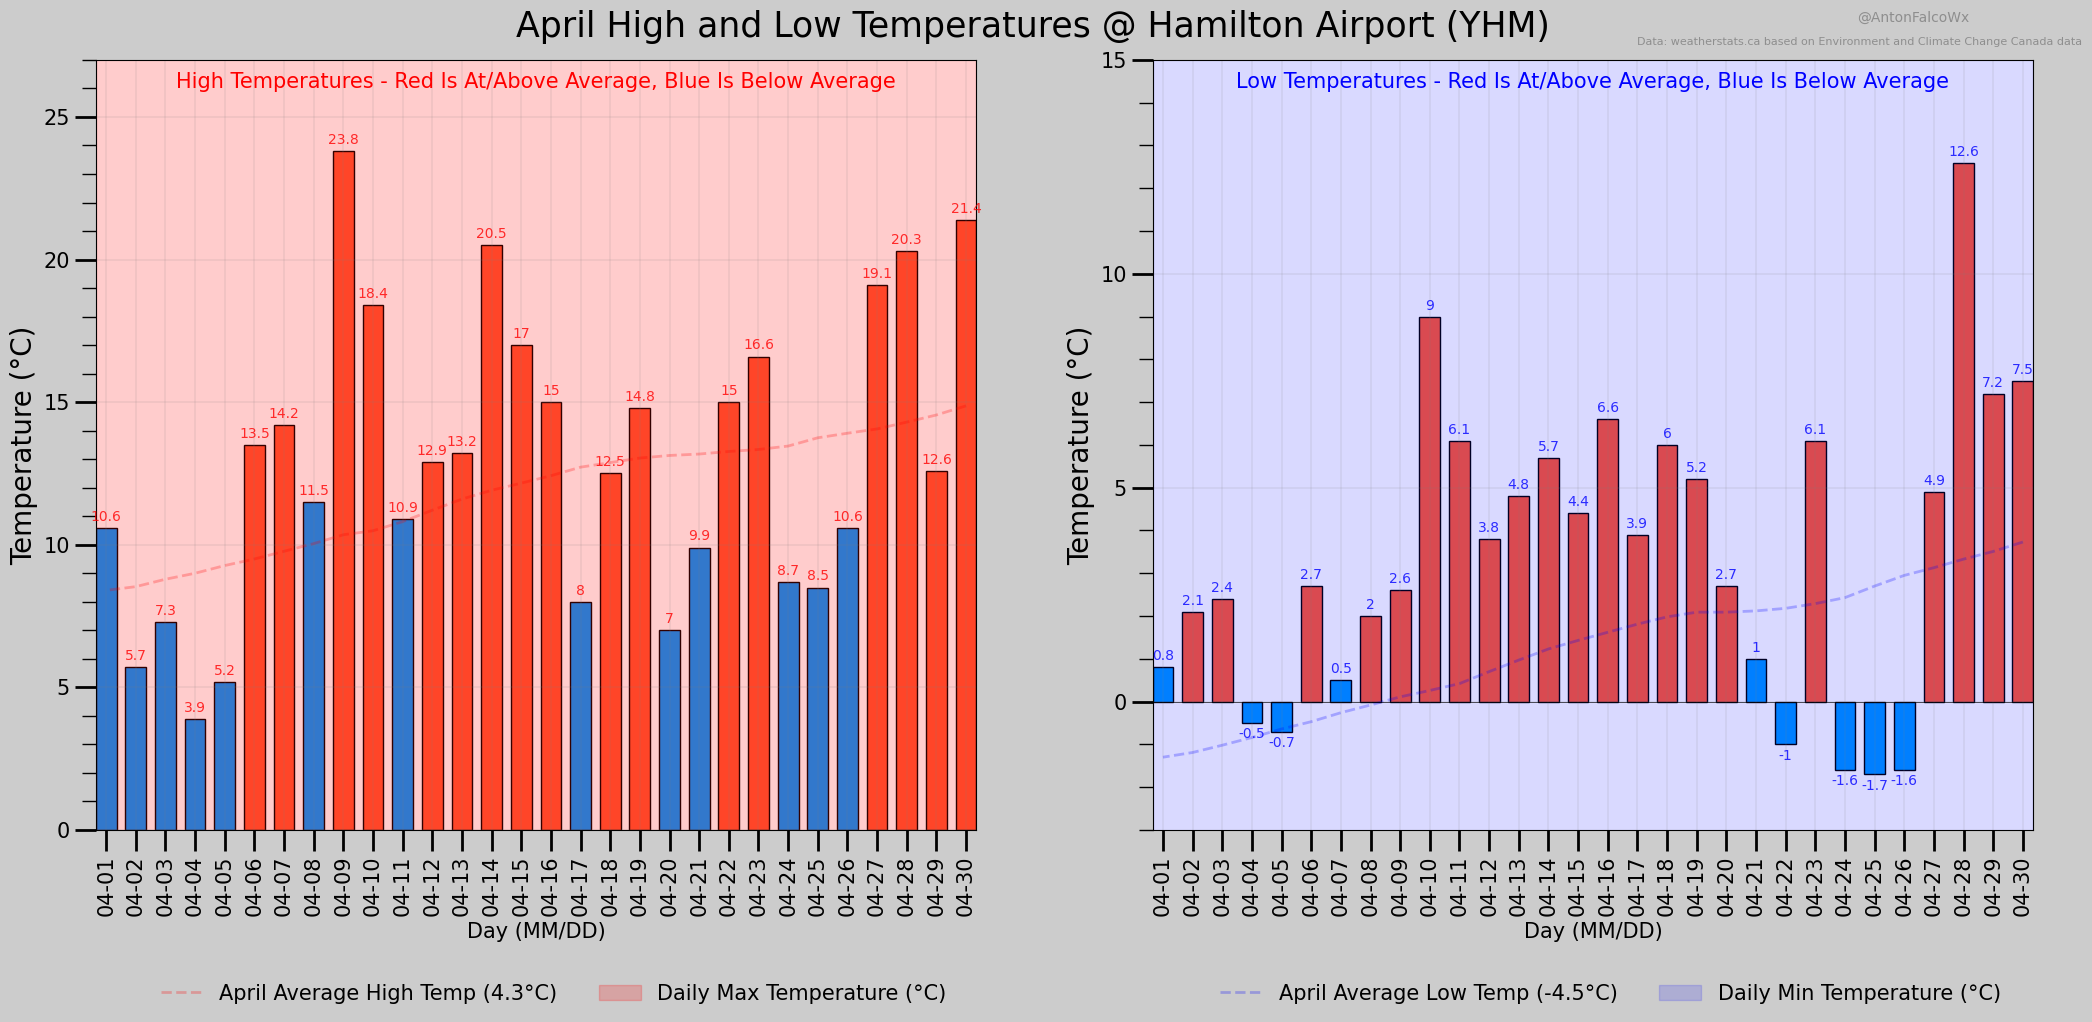

In [96]:
#Separated Highs and Lows
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(25,10))
fig.suptitle('April High and Low Temperatures @ Hamilton Airport (YHM)',  y=.93, fontweight='bold', fontsize=25)
#ax.set_facecolor('#DEDEDE')
#ax2.set_facecolor('#DEDEDE')
fig.patch.set_facecolor('#ccc')


#Bar Plots
Max_Temp = Yearly['max_temperature']
Min_Temp = Yearly['min_temperature']

#Left Plot: Data and below average color change
colormap = np.where(Yearly['max_temperature']< 11.8, '#0096FF','#FF5733')
Precip = ax.bar(height=Yearly['max_temperature'], x=Yearly['date'], width=0.7, color=colormap, edgecolor='black')
ax.bar_label(Precip, padding=3, fontsize=10, fontweight='bold', color='red', alpha=0.8)

#Right Plot: Data and below average color change
colormap=np.where(Yearly['min_temperature']> 1.5, '#FF5733','#0096FF')
Precip2 = ax2.bar(height=Yearly['min_temperature'], x=Yearly['date'], width=0.7, color=colormap, edgecolor='black')
ax2.bar_label(Precip2, padding=3, fontsize=10, fontweight='bold', color='blue', alpha=0.8)

#Yearly Normals plots and labels
ax.plot(Normals['date'], Normals['max_temperature_v'], '--', ms=5, color='r', linewidth=2.0, alpha=0.25)
ax2.plot(Normals['date'], Normals['min_temperature_v'], '--', ms=5, color='b', linewidth=2.0, alpha=0.25)


#Labels (left plot)
ax.grid(which='major', color='gray', linewidth=0.15)
ax.set_title('High Temperatures - Red Is At/Above Average, Blue Is Below Average',fontweight='bold', fontsize=15, color='red', y=1.0, pad=-20)
ax.set_xlabel('Day (MM/DD)',fontweight='bold', fontsize=15)
ax.set_ylabel('Temperature (°C)',fontweight='bold', fontsize=20)


#Labels (right plot)
ax2.grid(which='major', color='gray', linewidth=0.15)
ax2.set_title('Low Temperatures - Red Is At/Above Average, Blue Is Below Average', fontweight='bold', fontsize=15, color='blue', y=1.0, pad=-20)
ax2.set_xlabel('Day (MM/DD)', fontweight='bold', fontsize=15)
ax2.set_ylabel('Temperature (°C)', fontweight='bold', fontsize=20)


#Temperature & Day X/Y-axis
ax.margins(x=0)
ax.margins(y=0)
ax.set_ylim([0, 27])

ax2.margins(x=0)
ax2.margins(y=0)
ax2.set_ylim([-3, 15])

#Shaded background
ax.axhspan(-40, 40, alpha=0.2, color='r')
ax2.axhspan(40, -40, alpha=0.15, color='b')


#Legends 
ax.legend(["April Average High Temp (4.3°C)", "Daily Max Temperature (°C)"], fontsize=15, loc='lower center', bbox_to_anchor=(0.52, -0.25), ncol=2, frameon=False)
ax2.legend([ "April Average Low Temp (-4.5°C)", "Daily Min Temperature (°C)"], fontsize=15,loc='lower center', bbox_to_anchor=(0.52, -0.25), ncol=2, frameon=False)


#Changing the x and y axis intervals (ticks)
ax.xaxis.set_minor_locator(MultipleLocator())
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_major_locator(MultipleLocator(5))

ax2.xaxis.set_minor_locator(MultipleLocator())
ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.yaxis.set_minor_locator(MultipleLocator())
ax2.yaxis.set_major_locator(MultipleLocator(5))


#Longer Ticks
ax.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax.tick_params(axis='x', rotation=90)

ax2.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax2.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax2.tick_params(axis='x', rotation=90)


#Average lines (Average Temperature and Average Precip)
#ax.axhline(-1.7,0,28,color='red',linewidth=2.0,linestyle='dotted',alpha=0.5)
#ax2.axhline(-9.3,0,28,color='blue',linewidth=2.0,linestyle='dotted',alpha=0.5)

#Zero degree lines
#ax.axhline(-1.7,0,28,color='red',linewidth=2.0,linestyle='dotted',alpha=0.5)
ax.axhline(0,0,28,color='black',linewidth=0.5,linestyle='solid',alpha=0.9)
ax2.axhline(0,0,28,color='black',linewidth=0.5,linestyle='solid',alpha=0.9)

#Adding name 
plt.text(2.0, 1.05, '@AntonFalcoWx', fontsize = 10, transform=ax.transAxes, alpha=0.3)
plt.text(1.75, 1.02, 'Data: weatherstats.ca based on Environment and Climate Change Canada data', fontsize = 8, transform=ax.transAxes, alpha=0.3)

#plt.text(0.6, 0.8, 'April Average High Temp (-1.7°C)',color='red', fontsize = 12, transform=ax.transAxes, alpha=0.9)
#plt.text(1.8, 0.5, 'April Average Low Temp (-9.3°C)',color='blue', fontsize = 12, transform=ax.transAxes, alpha=0.9)


#Date formatter
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)

#plt.savefig('YHM_Normals vs April Bar Graph (double).jpg', dpi=300)
plt.show()
plt.close()

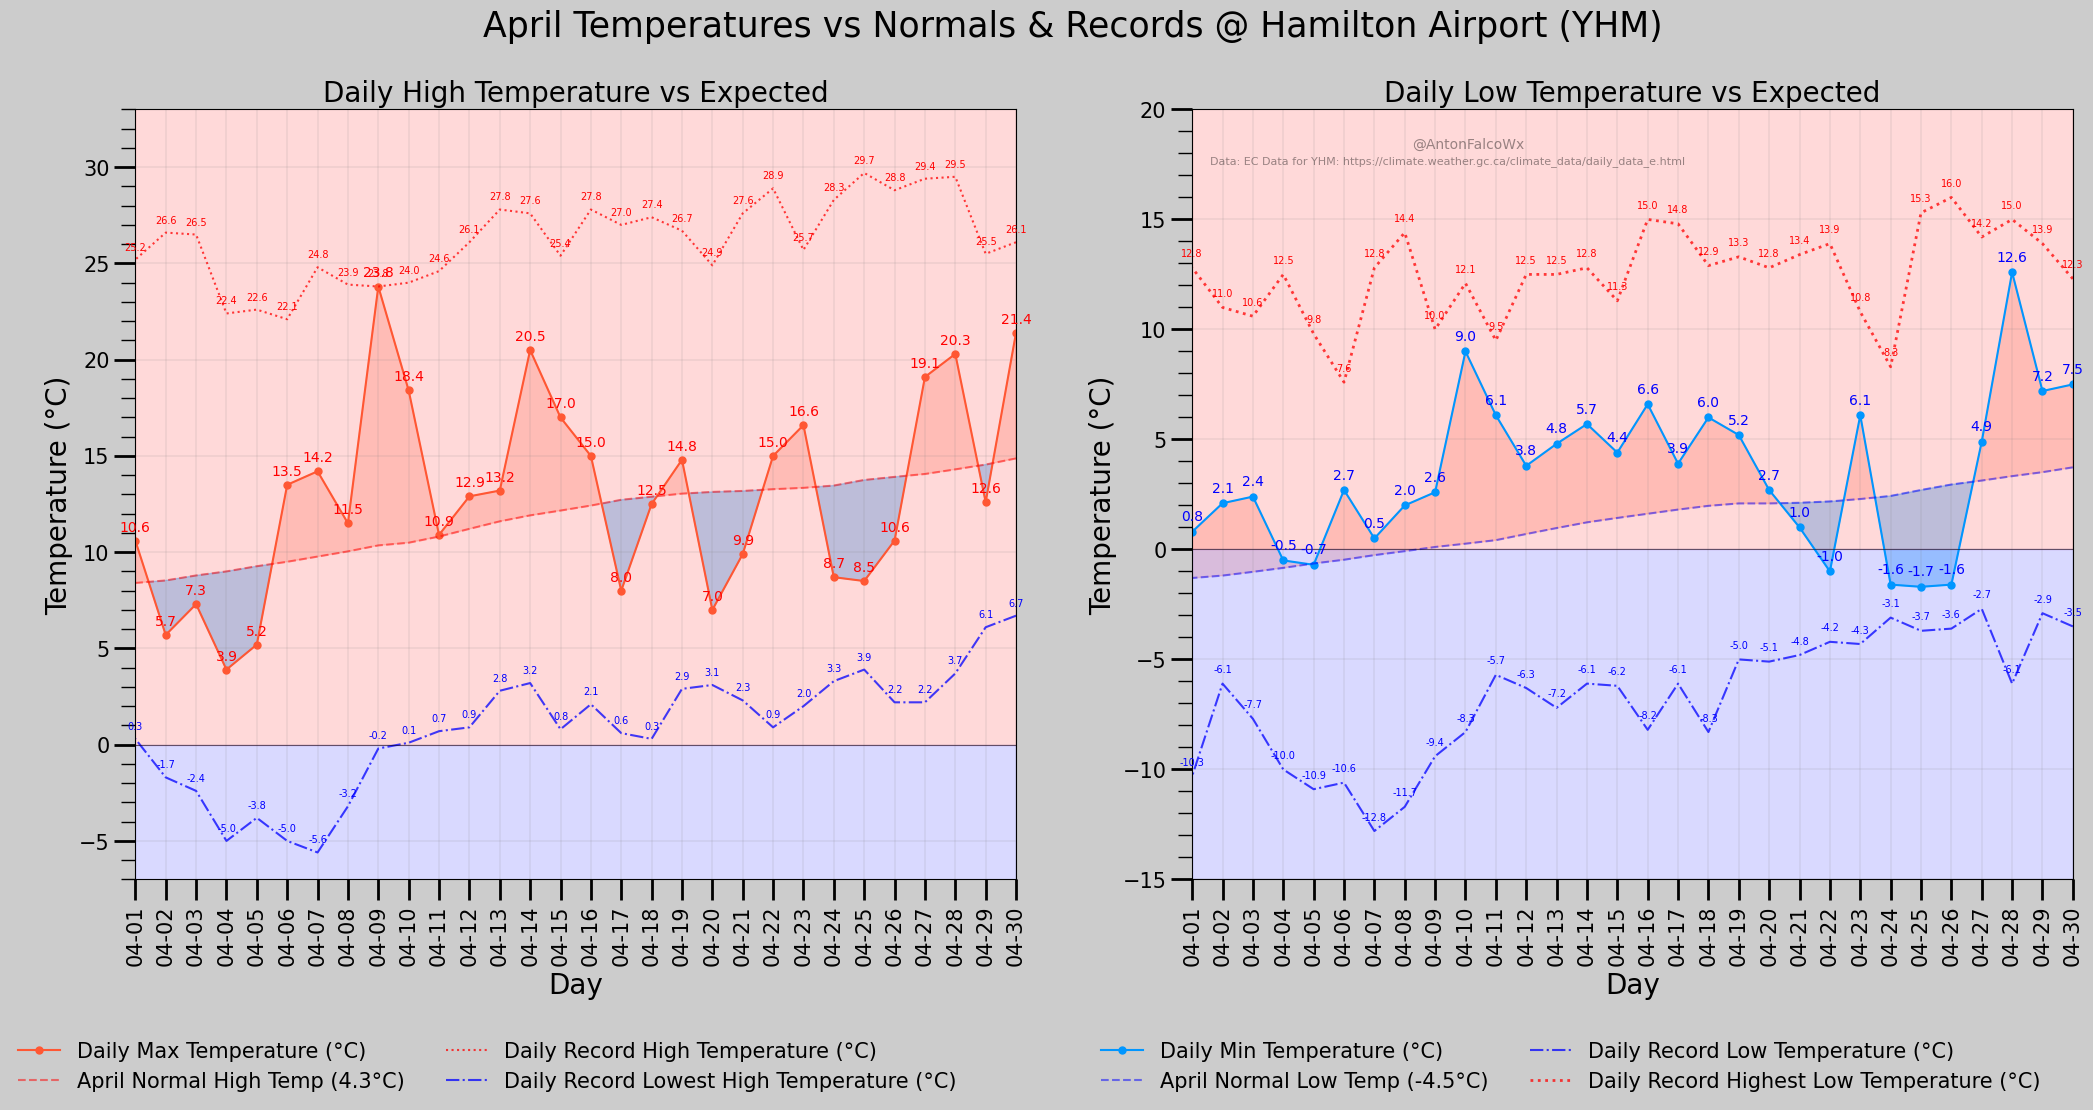

In [97]:
#Fill Differences From Average
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(25,10))
fig.suptitle('April Temperatures vs Normals & Records @ Hamilton Airport (YHM)', fontweight='bold', fontsize=25)
#ax.set_facecolor('#DEDEDE')
#ax2.set_facecolor('#DEDEDE')
fig.patch.set_facecolor('#ccc')


#Observations
Month = Yearly['date']
Max = Yearly['max_temperature']
Min = Yearly['min_temperature']

#Normals
Date = Normals['date']
High_Normals = Normals['max_temperature_v']
Low_Normals = Normals['min_temperature_v']

#Extremes
Extreme_Date = Extremes['date']
Highest_High = Extremes['max_temperature_v']
Lowest_High = Extremes['min_max_temperature_v']
Lowest_Low = Extremes['min_temperature_v']
Highest_Low = Extremes['max_min_temperature_v']


#Left axis: Normals, Observed & Extreme
ax.plot(Yearly['date'], Yearly['max_temperature'], '-o', ms=5, color='#FF5733', linewidth=1.5)
for i, txt in enumerate(Max):
    ax.annotate(txt, (Month[i], Max[i] + 0.5), ha='center', c='red', fontsize=10)

#Yearly High Normals plots and labels
ax.plot(Normals['date'], Normals['max_temperature_v'], '--', ms=5, color='red', linewidth=1.5, alpha=0.5)

#High Extremes: Highest High & Lowest High 
ax.plot(Extremes['date'], Extremes['max_temperature_v'], ':', ms=5, color='red', linewidth=1.5, alpha=0.75)
for i, txt in enumerate(Highest_High):
    ax.annotate(txt, (Extreme_Date[i], Highest_High[i] + 0.5), ha='center', c='red', fontsize=7)
    
ax.plot(Extremes['date'], Extremes['min_max_temperature_v'], '-.', ms=5, color='blue', linewidth=1.5, alpha=0.75)
for i, txt in enumerate(Lowest_High):
    ax.annotate(txt, (Extreme_Date[i], Lowest_High[i] + 0.5), ha='center', c='blue', fontsize=7)



#Right axis: Normals, Observed & Extreme
ax2.plot(Yearly['date'], Yearly['min_temperature'], '-o', ms=5, color='#0096FF', linewidth=1.5)
for i, txt in enumerate(Min):
    ax2.annotate(txt, (Month[i], Min[i] + 0.5), ha='center', c='blue', fontsize=10)
    
#Yearly Low Normals plots and labels
ax2.plot(Normals['date'], Normals['min_temperature_v'], '--', ms=5, color='b', linewidth=1.5, alpha=0.5) 

#Low Extremes: Lowest High & Lowest Low 
ax2.plot(Extremes['date'], Extremes['min_temperature_v'], '-.', ms=5, color='blue', linewidth=1.5, alpha=0.75)
for i, txt in enumerate(Lowest_Low):
    ax2.annotate(txt, (Extreme_Date[i], Lowest_Low[i] + 0.5), ha='center', c='blue', fontsize=7)

ax2.plot(Extremes['date'], Extremes['max_min_temperature_v'], ':', ms=5, color='red', linewidth=2.0, alpha=0.75)
for i, txt in enumerate(Highest_Low):
    ax2.annotate(txt, (Extreme_Date[i], Highest_Low[i] + 0.5), ha='center', c='red', fontsize=7)



#Labels
#left plot
ax.set_title('Daily High Temperature vs Expected',fontweight='bold', fontsize=20)
ax.set_xlabel('Day',fontweight='bold', fontsize=20)
ax.set_ylabel('Temperature (°C)',fontweight='bold', fontsize=20)
ax.grid(which='major', color='gray', linewidth=0.15)


#right plot
ax2.set_title('Daily Low Temperature vs Expected',fontweight='bold', fontsize=20)
ax2.set_xlabel('Day',fontweight='bold', fontsize=20)
ax2.set_ylabel('Temperature (°C)',fontweight='bold', fontsize=20)
ax2.grid(which='major', color='gray', linewidth=0.15)


#Legends (normals)
#ax.legend(["Daily Max Temperature (°C)", "April Daily Average High Temp (-1.7°C)"],fontsize=15, loc='lower center', bbox_to_anchor=(0.4, -0.25), ncol=2, frameon=False)
#ax2.legend(["Daily Min Temperature (°C)", "April Daily Average Low Temp (-9.3°C)"], fontsize=15, frameon=False, loc='lower center', bbox_to_anchor=(0.43, -0.25), ncol=2)

#Legends (extremes)
ax.legend(["Daily Max Temperature (°C)", "April Normal High Temp (4.3°C)", "Daily Record High Temperature (°C)", "Daily Record Lowest High Temperature (°C)"],fontsize=15, loc='lower center', 
          bbox_to_anchor=(0.4, -0.3), ncol=2, frameon=False)

ax2.legend(["Daily Min Temperature (°C)", "April Normal Low Temp (-4.5°C)", "Daily Record Low Temperature (°C)", "Daily Record Highest Low Temperature (°C)"], fontsize=15, frameon=False, loc='lower center',
           bbox_to_anchor=(0.43, -0.3), ncol=2)


#Fill-Ins for Above Average and Below Average Highs/Lows
#Fill (Highs)
ax.fill_between(Yearly['date'], High_Normals, Yearly['max_temperature'], where=Yearly['max_temperature']>= High_Normals, interpolate=True, color='#FF5733', alpha=0.2)
ax.fill_between(Yearly['date'], High_Normals, Yearly['max_temperature'], where=Yearly['max_temperature']<= High_Normals, interpolate=True, color='#0096FF', alpha=0.3)

#Fill (Lows)
ax2.fill_between(Yearly['date'], Low_Normals , Yearly['min_temperature'], where=Yearly['min_temperature']>= Low_Normals, interpolate=True, color='#FF5733', alpha=0.2)
ax2.fill_between(Yearly['date'], Low_Normals , Yearly['min_temperature'], where=Yearly['min_temperature']<= Low_Normals, interpolate=True, color='#0096FF', alpha=0.3)



#Parameters
ax.margins(x=0)
ax.margins(y=0)
ax2.margins(x=0)
ax2.margins(y=0)

#Normals Limits
#ax.set_ylim(-10, 8)
#ax2.set_ylim(-19, 4)

#Extreme Limits
ax.set_ylim(-7, 33)
ax2.set_ylim(-15, 20)


#Shaded background normals
#ax.axhspan(8, 0, alpha=0.15, color='r')
#ax.axhspan(0, -12, alpha=0.15, color='b')
#ax2.axhspan(5, 0, alpha=0.15, color='r')
#ax2.axhspan(0, -20, alpha=0.15, color='b')

#Shaded background extremes
ax.axhspan(40, 0, alpha=0.15, color='r')
ax.axhspan(0, -40, alpha=0.15, color='b')
ax2.axhspan(40, 0, alpha=0.15, color='r')
ax2.axhspan(0, -40, alpha=0.15, color='b')


#Longer Ticks
ax.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax2.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax2.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)


#Changing the x and y axis intervals (ticks)
ax.xaxis.set_minor_locator(MultipleLocator())
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_major_locator(MultipleLocator(5))
#ax2.yaxis.set_minor_locator(MultipleLocator())
#ax2.yaxis.set_major_locator(MultipleLocator(5))

#Right axis intervals (ticks)
ax2.xaxis.set_minor_locator(MultipleLocator())
ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.yaxis.set_minor_locator(MultipleLocator())
ax2.yaxis.set_major_locator(MultipleLocator(5))
ax2.yaxis.set_minor_locator(MultipleLocator())
ax2.yaxis.set_major_locator(MultipleLocator(5))

#Date formatter
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)


#Adding name and two line labels
plt.text(1.45, 0.95, '@AntonFalcoWx', fontsize = 10, transform=ax.transAxes, alpha=0.4)
plt.text(1.22, 0.93, 'Data: EC Data for YHM: https://climate.weather.gc.ca/climate_data/daily_data_e.html', fontsize = 8, transform=ax.transAxes, alpha=0.4)
#plt.text(0.02, 0.37, 'April Average High Temp (-1.7°C)',color='red', fontsize = 14, transform=ax.transAxes, alpha=0.9)
#plt.text(1.25, 0.33, 'April Average Low Temp (-9.3°C)',color='blue', fontsize = 14, transform=ax.transAxes, alpha=0.9)
#plt.text(0.3, 0.12, 'April Average Precip Per Day (1981-2010)',color='green', fontsize = 14, transform=ax.transAxes, alpha=0.9)


#Average lines (Average Temperature and Average Precip)
#ax.axhline(-1.7,0,28,color='red',linewidth=2.0,linestyle='dotted',alpha=0.5)
#ax2.axhline(-9.3,0,28,color='blue',linewidth=2.0,linestyle='dotted',alpha=0.5)
ax.axhline(0,0,28,color='black',linewidth=0.5,linestyle='solid', alpha=0.7)
ax2.axhline(0,0,28,color='black',linewidth=0.5,linestyle='solid', alpha=0.7)


#plt.savefig('YHM_Normals vs April (double).jpg', dpi=300)
plt.show()
plt.close()

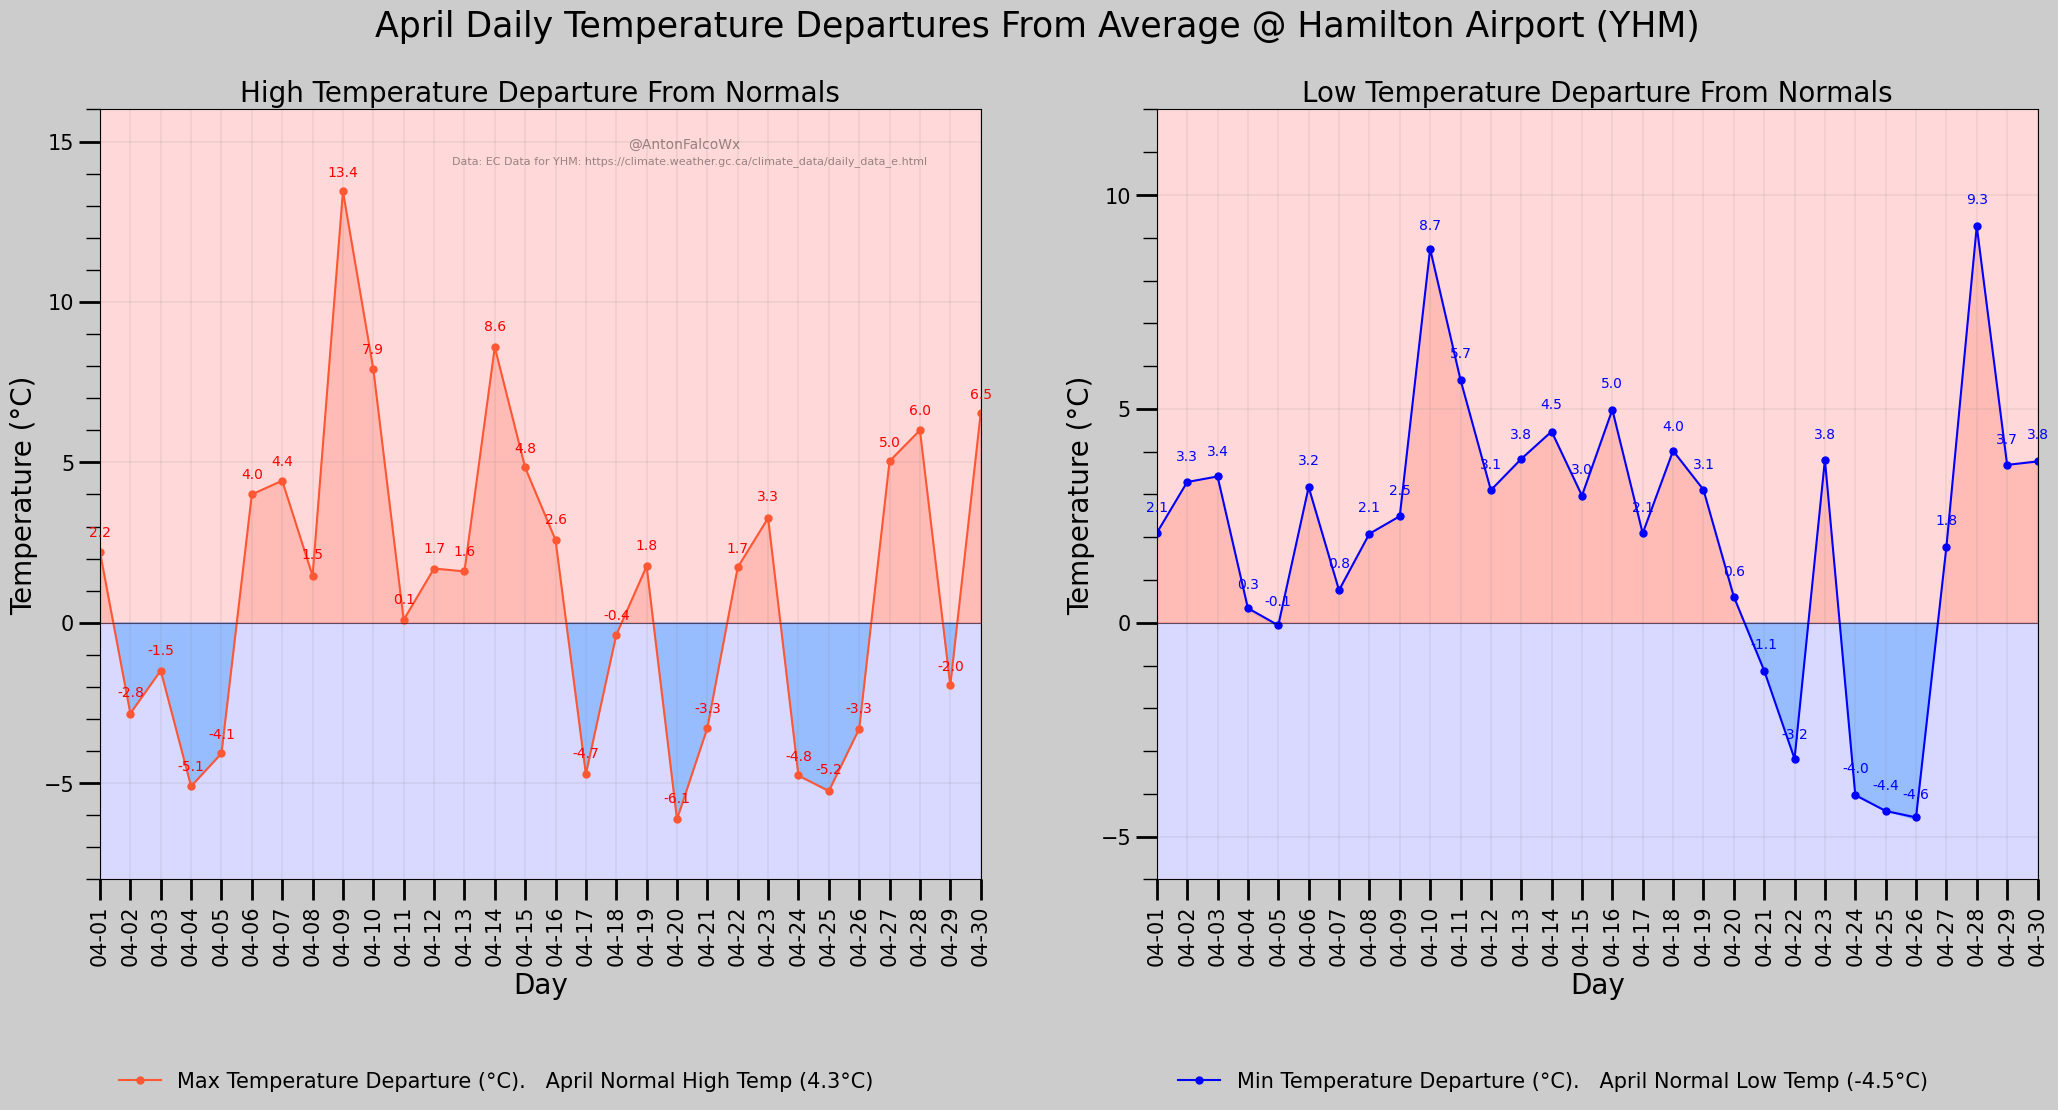

In [98]:
#Fill Differences From Average
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(25,10))
fig.suptitle('April Daily Temperature Departures From Average @ Hamilton Airport (YHM)', fontweight='bold', fontsize=25)
#ax.set_facecolor('#DEDEDE')
#ax2.set_facecolor('#DEDEDE')
fig.patch.set_facecolor('#ccc')


#Observations
Month = Yearly['date']
Max = Yearly['max_temperature']
Min = Yearly['min_temperature']

#Normals
Date = Normals['date']
High_Normals = Normals['max_temperature_v']
Low_Normals = Normals['min_temperature_v']

#Extremes
Extreme_Date = Extremes['date']
Highest_High = Extremes['max_temperature_v']
Lowest_High = Extremes['min_max_temperature_v']
Lowest_Low = Extremes['min_temperature_v']
Highest_Low = Extremes['max_min_temperature_v']


#Departures From Average (Highs)
Yearly['Departure_From_Normal_Highs'] = Yearly['max_temperature'] - Normals['max_temperature_v']
Departure_Highs = Yearly['Departure_From_Normal_Highs'].round(1)

#Departures From Average (Lows)
Yearly['Departure_From_Normal_Lows'] = Yearly['min_temperature'] - Normals['min_temperature_v']
Departure_Lows = Yearly['Departure_From_Normal_Lows'].round(1)



#Left axis: Normals, Observed & Extreme
ax.plot(Yearly['date'], Yearly['Departure_From_Normal_Highs'], '-o', ms=5, color='#FF5733', linewidth=1.5)
for i, txt in enumerate(Departure_Highs):
    ax.annotate(txt, (Month[i], Departure_Highs[i] + 0.5), ha='center', c='red', fontsize=10)

#Yearly High Normals plots and labels
#ax.plot(Normals['date'], Normals['max_temperature_v'], '--', ms=5, color='red', linewidth=1.5, alpha=0.5)


#Right axis: Normals, Observed & Extreme
ax2.plot(Yearly['date'], Yearly['Departure_From_Normal_Lows'], '-o', ms=5, color='blue', linewidth=1.5)
for i, txt in enumerate(Departure_Lows):
    ax2.annotate(txt, (Month[i], Departure_Lows[i] + 0.5), ha='center', c='blue', fontsize=10)
    
#Yearly Low Normals plots and labels
#ax2.plot(Normals['date'], Normals['min_temperature_v'], '--', ms=5, color='b', linewidth=1.5, alpha=0.5) 



#Labels
#left plot
ax.set_title('High Temperature Departure From Normals',fontweight='bold', fontsize=20)
ax.set_xlabel('Day',fontweight='bold', fontsize=20)
ax.set_ylabel('Temperature (°C)',fontweight='bold', fontsize=20)
ax.grid(which='major', color='gray', linewidth=0.15)


#right plot
ax2.set_title('Low Temperature Departure From Normals',fontweight='bold', fontsize=20)
ax2.set_xlabel('Day',fontweight='bold', fontsize=20)
ax2.set_ylabel('Temperature (°C)',fontweight='bold', fontsize=20)
ax2.grid(which='major', color='gray', linewidth=0.15)


#Legends (extremes)
ax.legend(["Max Temperature Departure (°C).   April Normal High Temp (4.3°C)"],fontsize=15, loc='lower center', bbox_to_anchor=(0.45, -0.3), ncol=2, frameon=False)
ax2.legend(["Min Temperature Departure (°C).   April Normal Low Temp (-4.5°C)"], fontsize=15, frameon=False, loc='lower center', bbox_to_anchor=(0.45, -0.3), ncol=2)


#Fill-Ins for Above Average and Below Average Highs/Lows
#Fill (Highs)
ax.fill_between(Yearly['date'], 0, Departure_Highs, where=Departure_Highs>=0, interpolate=True, color='#FF5733', alpha=0.2)
ax.fill_between(Yearly['date'], 0, Departure_Highs, where=Departure_Highs<=0, interpolate=True, color='#0096FF', alpha=0.3)

#Fill (Lows)
ax2.fill_between(Yearly['date'], 0, Departure_Lows, where=Departure_Lows>=0, interpolate=True, color='#FF5733', alpha=0.2)
ax2.fill_between(Yearly['date'], 0, Departure_Lows, where=Departure_Lows<=0, interpolate=True, color='#0096FF', alpha=0.3)



#Parameters
ax.margins(x=0)
ax.margins(y=0)
ax2.margins(x=0)
ax2.margins(y=0)

#Normals Limits
#ax.set_ylim(-10, 8)
#ax2.set_ylim(-19, 4)

#Extreme Limits
ax.set_ylim(-8, 16)
ax2.set_ylim(-6, 12)


#Shaded background normals
#ax.axhspan(8, 0, alpha=0.15, color='r')
#ax.axhspan(0, -12, alpha=0.15, color='b')
#ax2.axhspan(5, 0, alpha=0.15, color='r')
#ax2.axhspan(0, -20, alpha=0.15, color='b')

#Shaded background extremes
ax.axhspan(40, 0, alpha=0.15, color='r')
ax.axhspan(0, -40, alpha=0.15, color='b')
ax2.axhspan(40, 0, alpha=0.15, color='r')
ax2.axhspan(0, -40, alpha=0.15, color='b')


#Longer Ticks
ax.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax2.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax2.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)


#Changing the x and y axis intervals (ticks)
ax.xaxis.set_minor_locator(MultipleLocator())
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_major_locator(MultipleLocator(5))
#ax2.yaxis.set_minor_locator(MultipleLocator())
#ax2.yaxis.set_major_locator(MultipleLocator(5))

#Right axis intervals (ticks)
ax2.xaxis.set_minor_locator(MultipleLocator())
ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.yaxis.set_minor_locator(MultipleLocator())
ax2.yaxis.set_major_locator(MultipleLocator(5))
ax2.yaxis.set_minor_locator(MultipleLocator())
ax2.yaxis.set_major_locator(MultipleLocator(5))

#Date formatter
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)


#Adding name and two line labels
plt.text(0.6, 0.95, '@AntonFalcoWx', fontsize = 10, transform=ax.transAxes, alpha=0.4)
plt.text(0.4, 0.93, 'Data: EC Data for YHM: https://climate.weather.gc.ca/climate_data/daily_data_e.html', fontsize = 8, transform=ax.transAxes, alpha=0.4)
#plt.text(0.02, 0.37, 'April Average High Temp (-1.7°C)',color='red', fontsize = 14, transform=ax.transAxes, alpha=0.9)
#plt.text(1.25, 0.33, 'April Average Low Temp (-9.3°C)',color='blue', fontsize = 14, transform=ax.transAxes, alpha=0.9)
#plt.text(0.3, 0.12, 'April Average Precip Per Day (1981-2010)',color='green', fontsize = 14, transform=ax.transAxes, alpha=0.9)


#Average lines (Average Temperature and Average Precip)
#ax.axhline(-1.7,0,28,color='red',linewidth=2.0,linestyle='dotted',alpha=0.5)
#ax2.axhline(-9.3,0,28,color='blue',linewidth=2.0,linestyle='dotted',alpha=0.5)
ax.axhline(0,0,28,color='black',linewidth=0.5,linestyle='solid', alpha=0.7)
ax2.axhline(0,0,28,color='black',linewidth=0.5,linestyle='solid', alpha=0.7)


#plt.savefig('YHM_Normals vs April (double).jpg', dpi=300)
plt.show()
plt.close()

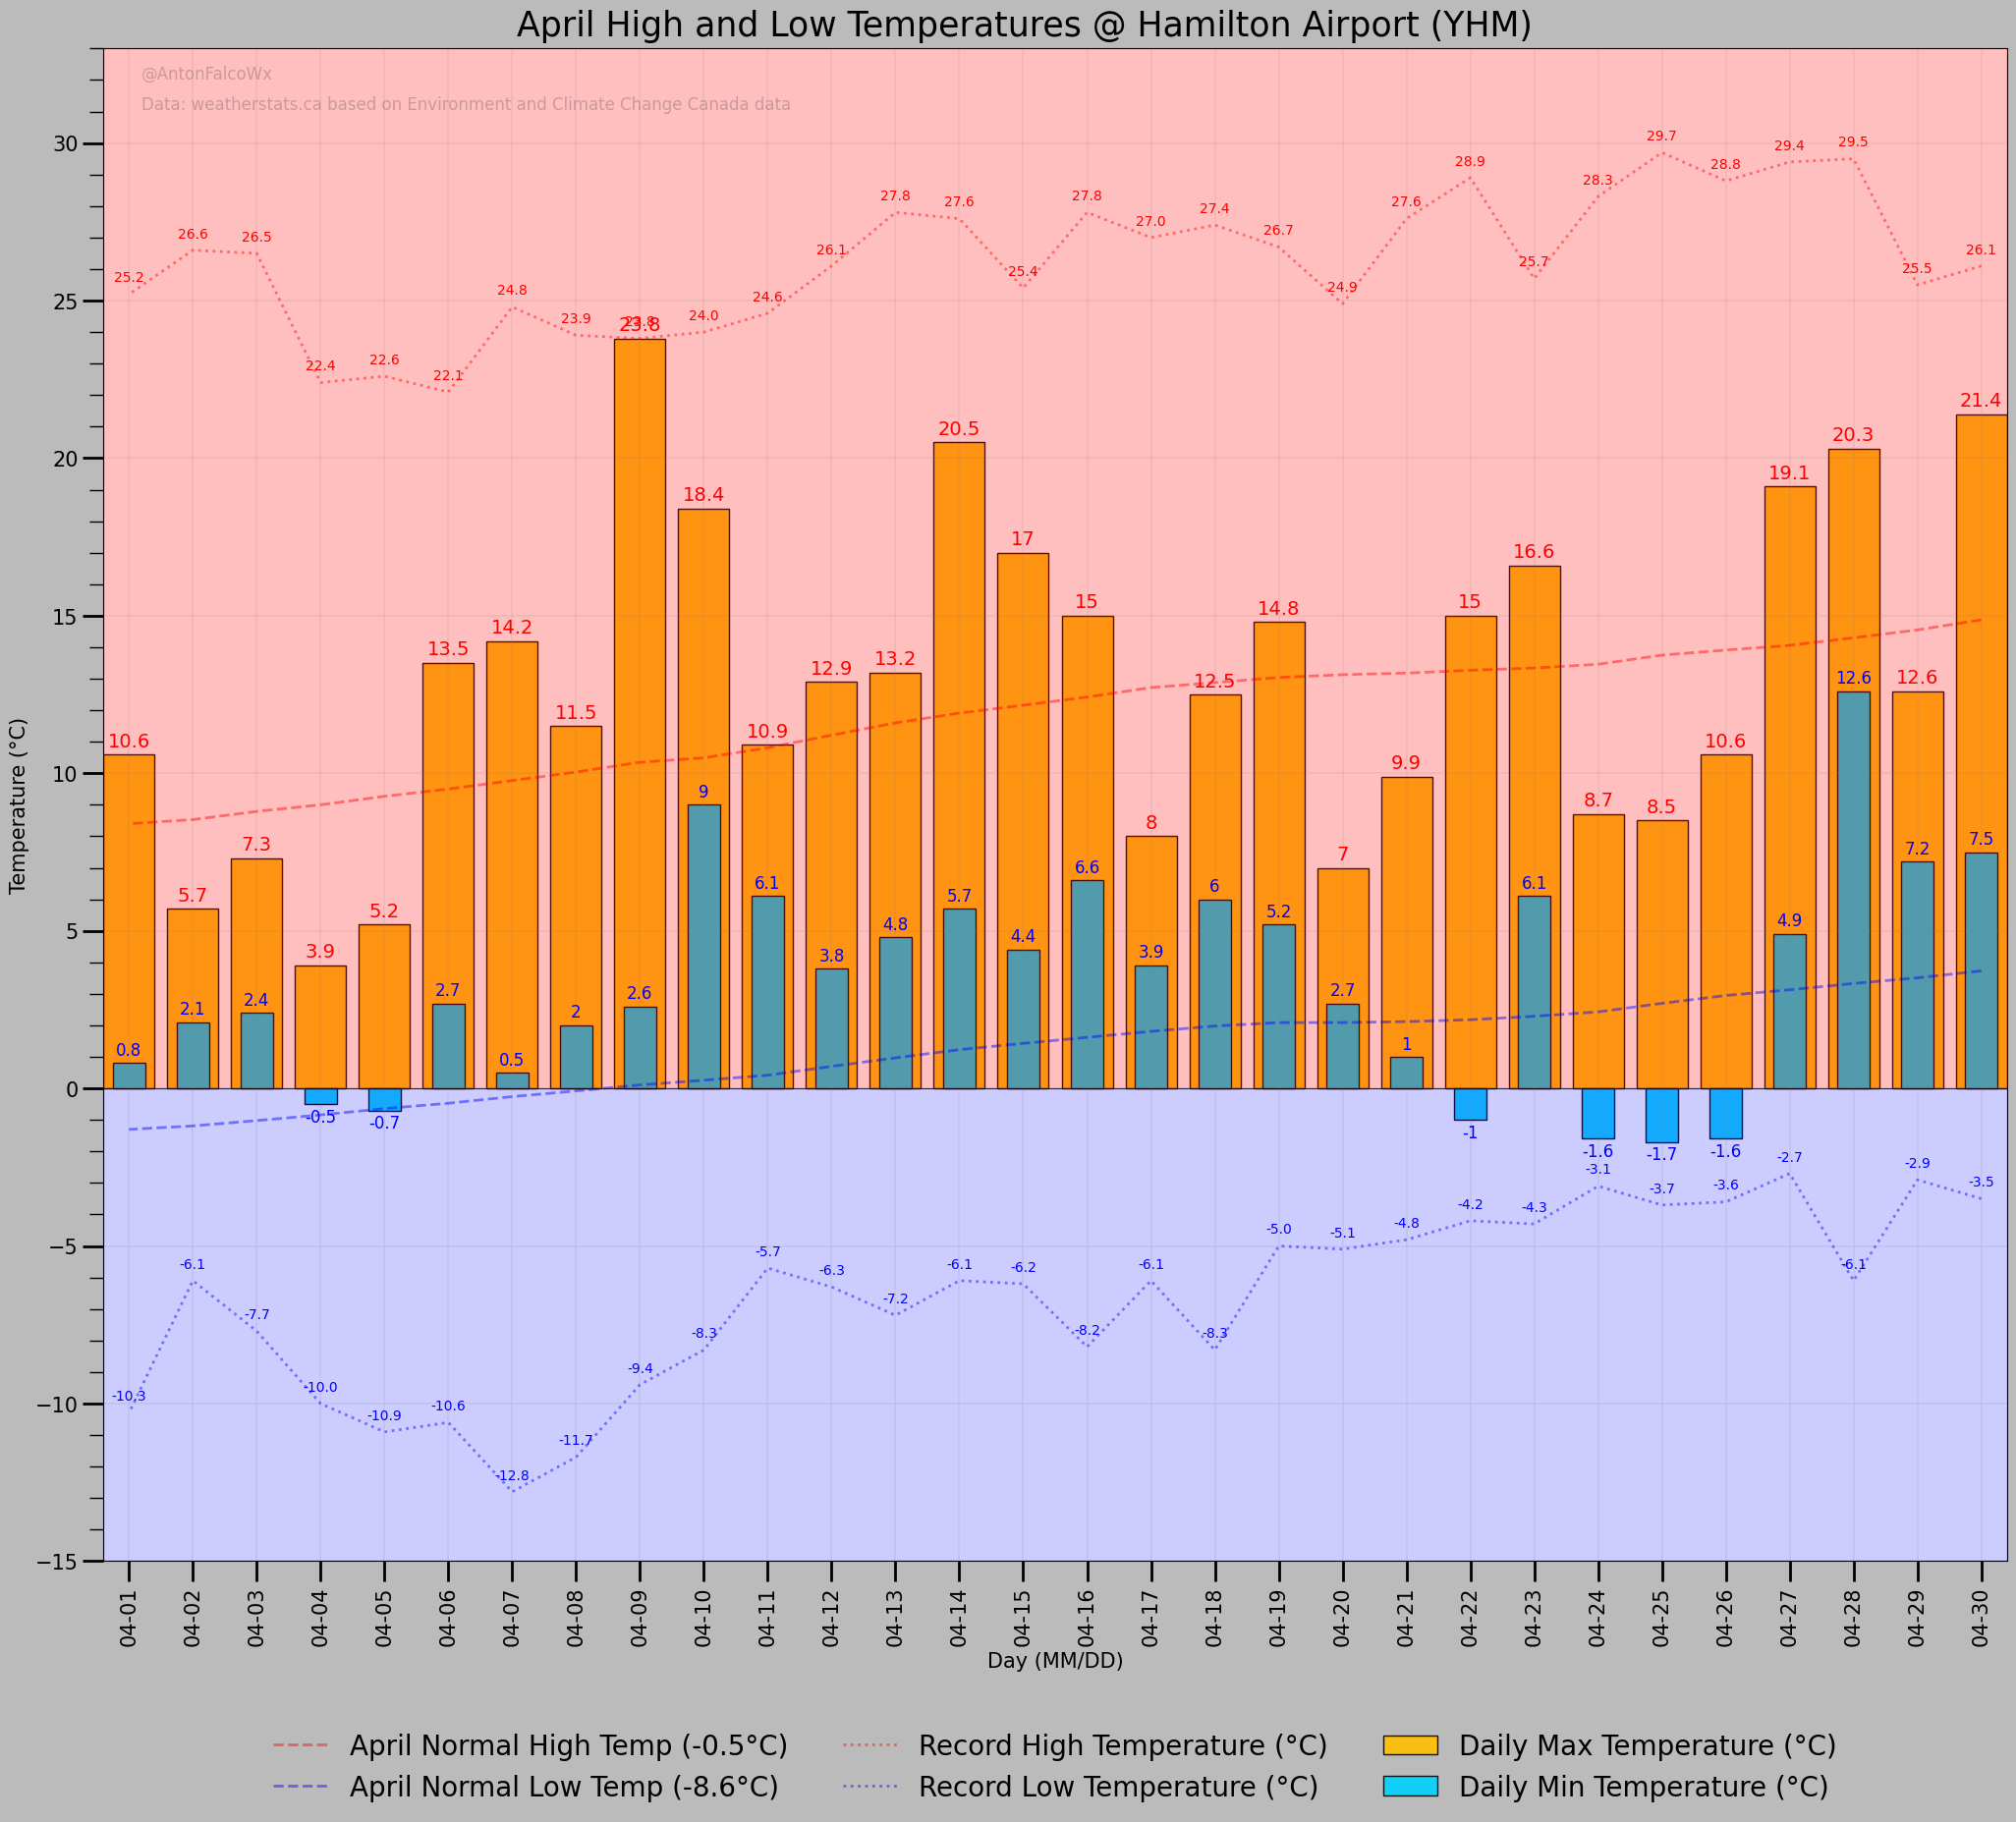

In [99]:
#Overlapping Highs and Lows
fig, ax = plt.subplots(figsize=(25,20))
fig.suptitle('April High and Low Temperatures @ Hamilton Airport (YHM)',  y=.9, fontweight='bold', fontsize=25)
#ax.set_facecolor('#DEDEDE')
fig.patch.set_facecolor('#bbb')


#Vertical layout
#fig, (ax, ax2) = plt.subplots(2, figsize=(18,15))
#ax.plot(1, 2)
#ax2.plot(1, -2)
#fig.suptitle('April High and Low Temperatures @ Hamilton Airport (YHM)', y=.90, fontweight='bold', fontsize=20) #y=.90 adjusts title
#ax.set_facecolor('#DEDEDE')
#ax2.set_facecolor('#DEDEDE')
#fig.patch.set_facecolor('#bbb')


#Extremes
Extreme_Date = Extremes['date']
Highest_High = Extremes['max_temperature_v']
Lowest_High = Extremes['min_max_temperature_v']
Lowest_Low = Extremes['min_temperature_v']
Highest_Low = Extremes['max_min_temperature_v']


#Yearly Normals plots and labels
ax.plot(Normals['date'], Normals['max_temperature_v'], '--', ms=5, color='r', linewidth=2.0, alpha=0.45)
ax.plot(Normals['date'], Normals['min_temperature_v'], '--', ms=5, color='b', linewidth=2.0, alpha=0.45) 


#Extremes
ax.plot(Extremes['date'], Extremes['max_temperature_v'], ':', ms=5, color='red', linewidth=2, alpha=0.45)
for i, txt in enumerate(Highest_High):
    ax.annotate(txt, (Extreme_Date[i], Highest_High[i] + 0.4), ha='center', c='red', fontsize=10)

ax.plot(Extremes['date'], Extremes['min_temperature_v'], ':', ms=5, color='blue', linewidth=2, alpha=0.45)
for i, txt in enumerate(Lowest_Low):
    ax.annotate(txt, (Extreme_Date[i], Lowest_Low[i] + 0.4), ha='center', c='blue', fontsize=10)




#Bar Plot
Date = (Yearly['date'])
Max = (Yearly['max_temperature'])
Min = (Yearly['min_temperature'])

rects1 = ax.bar((Yearly['date']), Yearly['max_temperature'], width=0.8, label='Max', color='#FFBF00', alpha=0.9, edgecolor='black')
rects2 = ax.bar((Yearly['date']), Yearly['min_temperature'], width=0.5, label='Min', color='#00d2ff', alpha=0.9, edgecolor='black')

plt.bar_label(rects1, padding=3, fontsize=14, color='red', fontweight='bold')
plt.bar_label(rects2, padding=3, fontsize=12, color='blue', fontweight='bold')


#Legends 
ax.legend(["April Normal High Temp (-0.5°C)", "April Normal Low Temp (-8.6°C)", "Record High Temperature (°C)", "Record Low Temperature (°C)", "Daily Max Temperature (°C)", "Daily Min Temperature (°C)"], fontsize=20,
          loc='lower center', bbox_to_anchor=(0.5, -0.175), ncol=3, frameon=False)


#Labels (right plot)
ax.grid(which='major', color='gray', linewidth=0.15)
ax.set_xlabel('Day (MM/DD)',fontweight='bold', fontsize=15)
ax.set_ylabel('Temperature (°C)',fontweight='bold', fontsize=15)


#Temperature & Day X/Y-axis
ax.margins(x=0)
ax.margins(y=0)
ax.set_ylim([-15, 33])

#Shaded background (red)
ax.axhspan(40, 0, alpha=0.25, color='r')

#Shaded background (blue)
ax.axhspan(-26, 0, alpha=0.2, color='b')



#Changing the x and y axis intervals (ticks)
ax.xaxis.set_minor_locator(MultipleLocator())
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator())
ax.yaxis.set_major_locator(MultipleLocator(5))


#Longer Ticks
ax.tick_params('both', length=15, width=2, which='major', labelsize=15)
ax.tick_params('both', length=10, width=1, which='minor', labelsize=15)
ax.tick_params(axis='x', rotation=90)


#Adding name 
plt.text(0.02, 0.98, '@AntonFalcoWx', fontsize = 12, transform=ax.transAxes, alpha=0.2)
plt.text(0.02, 0.96, 'Data: weatherstats.ca based on Environment and Climate Change Canada data', fontsize = 12, transform=ax.transAxes, alpha=0.2)


#Average lines (Average Temperature and Average Precip)
#ax.axhline(-1.7,0,28,color='red',linewidth=2.0,linestyle='dotted',alpha=0.5)
#ax.axhline(-9.3,0,28,color='blue',linewidth=2.0,linestyle='dotted',alpha=0.5)
ax.axhline(0,0,28,color='black',linewidth=0.5,linestyle='solid')


#plt.text(0.75, 0.58, 'April Average High Temp (-1.7°C)',color='red', fontsize = 16, transform=ax.transAxes, alpha=0.9)
#plt.text(0.1, 0.34, 'April Average Low Temp (-9.3°C)',color='blue', fontsize = 16, transform=ax.transAxes, alpha=0.9)
#plt.text(0.36, 0.96, 'Record High (14.3°C): April 9th', color='red', fontweight='bold', fontsize=15, transform=ax.transAxes)
#plt.text(0.36, 0.96, 'Record Low (5.6°C): April 10th', color='blue', fontweight='bold', fontsize=15, transform=ax.transAxes)
#plt.text(0.16, 0.85, 'Wildfire Smoke', color='black', fontsize=12, transform=ax.transAxes)


#Vertical Shading (smoke)
#start_date = dt.datetime(2023, 6, 5)
#end_date = dt.datetime(2023, 6, 8)
#ax.axvspan(start_date, end_date, alpha=0.35, color='gray')


#Date formatter
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)


#plt.savefig('YHM_Normals vs April Bar Graph (Overlap).jpg', dpi=300)
plt.show()
plt.close()